# SMC & SMC'

In [1]:
# Import packages.
import copy
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import msprime
import numpy as np
import pandas as pd
import smclib

# Print version numbers.
print("matplotlib", matplotlib.__version__)
print("msprime", msprime.__version__)
print("numpy", np.__version__)
print("pandas", pd.__version__)
# Intialize the matplolib styling.
plt.rcParams.update(
    {
        "figure.constrained_layout.use": True,
        "figure.facecolor": "white",
        "axes.spines.top": False,
        "axes.spines.right": False,
        "legend.frameon": False,
    }
)

matplotlib 3.5.3
msprime 1.2.0
numpy 1.26.0
pandas 1.5.3


## Generate Simulated Data

Theoretically, you only need to do this once...

### Number of Recombination Events

In [2]:
# Intialize an lisy of populuation recombination rate values.
R_rhos = np.array([0.1, 1, 10, 100, 1_000])
# Intialize a dictionary to store the receombination event results.
recomb_dicc = {
    "standard": {},
    "msp_smc": {},
    "djp_smc": {},
    "msp_smc_prime": {},
    "djp_smc_prime": {},
}
# For every population recombination rate.
for i, rho in enumerate(R_rhos):
    # Intialize lists to store the results.
    recomb_dicc["standard"][rho] = []
    recomb_dicc["msp_smc"][rho] = []
    recomb_dicc["djp_smc"][rho] = []
    recomb_dicc["msp_smc_prime"][rho] = []
    recomb_dicc["djp_smc_prime"][rho] = []
    # Assuming Ne = 1, compute r.
    r = rho / 4
    # For 1000 replicate simulations.
    for _ in range(1000):
        # Simulate tree-sequences.
        ts_standard = msprime.sim_ancestry(
            samples=[msprime.SampleSet(2, ploidy=1)],
            population_size=1,
            ploidy=2,
            recombination_rate=r,
            sequence_length=1,
            record_full_arg=True,
            discrete_genome=False,
        )
        ts_msp_smc = msprime.sim_ancestry(
            samples=[msprime.SampleSet(2, ploidy=1)],
            population_size=1,
            ploidy=2,
            recombination_rate=r,
            sequence_length=1,
            model="smc",
            record_full_arg=True,
            discrete_genome=False,
        )
        ts_msp_smc_prime = msprime.sim_ancestry(
            samples=[msprime.SampleSet(2, ploidy=1)],
            population_size=1,
            ploidy=2,
            recombination_rate=r,
            sequence_length=1,
            model="smc_prime",
            record_full_arg=True,
            discrete_genome=False,
        )
        ts_djp_smc = smclib.sim_smc(k=2, Ne=1, rho=rho, ploidy=2)
        ts_djp_smc_prime = smclib.sim_smc_prime(k=2, Ne=1, rho=rho, ploidy=2)
        # Update the dictionary.
        recomb_dicc["standard"][rho].append(smclib.R_g_arg(ts_standard))
        recomb_dicc["msp_smc"][rho].append(smclib.R_g_arg(ts_msp_smc))
        recomb_dicc["djp_smc"][rho].append(smclib.R_arg_dicc(ts_djp_smc))
        recomb_dicc["msp_smc_prime"][rho].append(smclib.R_g_arg(ts_msp_smc_prime))
        recomb_dicc["djp_smc_prime"][rho].append(smclib.R_arg_dicc(ts_djp_smc_prime))

In [3]:
# For every model.
for model in ["standard", "msp_smc", "djp_smc", "msp_smc_prime", "djp_smc_prime"]:
    # For every population recombination rate.
    for rho in R_rhos:
        # If the population recombination rate is 1, 10, or 100.
        if rho >= 1:
            # Format as an integer.
            rho = int(rho)
        # Export the number of recombination events result.
        np.savetxt(
            f"./data/{model}_rho_{rho}_num_recomb_events.txt.gz",
            [np.array(recomb_dicc[model][rho])],
            fmt="%d",
        )

### $i^{th}$ Tree Height

In [4]:
# Define a list of tree indicies.
tree_idx = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1])
# Intialize an lisy of populuation recombination rate values.
ith_rhos = np.array([1, 100])
# Intialize sample sizes.
ns = np.array([2, 3, 4, 5, 10, 20])
# Intialize a dictionary to store the tree heights and width.
height_dicc = {
    "standard": {},
    "msp_smc": {},
    "djp_smc": {},
    "msp_smc_prime": {},
    "djp_smc_prime": {},
}
width_dicc = {
    "standard": {},
    "msp_smc": {},
    "djp_smc": {},
    "msp_smc_prime": {},
    "djp_smc_prime": {},
}
# For every sample size.
for n in ns:
    # Intialize subdictionaries.
    for key in height_dicc:
        height_dicc[key][n] = {}
        width_dicc[key][n] = {}
    # For every population recombination rate.
    for rho in ith_rhos:
        # Intialize subdictionaries.
        for key in height_dicc:
            height_dicc[key][n][rho] = np.zeros((1_000, tree_idx.size))
            width_dicc[key][n][rho] = np.zeros((1_000, tree_idx.size))
        # Assuming Ne = 1, compute r.
        r = rho / 4
        # For 1000 replicate simulations.
        for i in range(1000):
            # Simulate tree-sequences.
            ts_standard = msprime.sim_ancestry(
                samples=[msprime.SampleSet(n, ploidy=1)],
                population_size=1,
                ploidy=2,
                recombination_rate=r,
                sequence_length=1,
                discrete_genome=False,
            )
            ts_msp_smc = msprime.sim_ancestry(
                samples=[msprime.SampleSet(n, ploidy=1)],
                population_size=1,
                ploidy=2,
                recombination_rate=r,
                sequence_length=1,
                model="smc",
                discrete_genome=False,
            )
            ts_msp_smc_prime = msprime.sim_ancestry(
                samples=[msprime.SampleSet(n, ploidy=1)],
                population_size=1,
                ploidy=2,
                recombination_rate=r,
                sequence_length=1,
                model="smc_prime",
                discrete_genome=False,
            )
            ts_djp_smc = smclib.ith_tree_smc(k=n, Ne=1, rho=rho, ploidy=2)
            ts_djp_smc_prime = smclib.ith_tree_smc_prime(k=n, Ne=1, rho=rho, ploidy=2)
            # For every ith tree index.
            for j in tree_idx:
                # Find the ith tree heights and widths.
                standard_height, standard_width = smclib.ith_tmrca_ts(
                    ts=ts_standard, ith_tree=j
                )
                msp_smc_height, msp_smc_width = smclib.ith_tmrca_ts(
                    ts=ts_msp_smc, ith_tree=j
                )
                djp_smc_height, djp_smc_width = smclib.ith_tmrca_ts_dicc(
                    ts_dicc=ts_djp_smc, ith_tree=j
                )
                msp_smc_prime_height, msp_smc_prime_width = smclib.ith_tmrca_ts(
                    ts=ts_msp_smc_prime, ith_tree=j
                )
                djp_smc_prime_height, djp_smc_prime_width = smclib.ith_tmrca_ts_dicc(
                    ts_dicc=ts_djp_smc_prime, ith_tree=j
                )
                # Update the results.
                height_dicc["standard"][n][rho][i, j] = standard_height
                height_dicc["msp_smc"][n][rho][i, j] = msp_smc_height
                height_dicc["djp_smc"][n][rho][i, j] = djp_smc_height
                height_dicc["msp_smc_prime"][n][rho][i, j] = msp_smc_prime_height
                height_dicc["djp_smc_prime"][n][rho][i, j] = djp_smc_prime_height
                width_dicc["standard"][n][rho][i, j] = standard_width
                width_dicc["msp_smc"][n][rho][i, j] = msp_smc_width
                width_dicc["djp_smc"][n][rho][i, j] = djp_smc_width
                width_dicc["msp_smc_prime"][n][rho][i, j] = msp_smc_prime_width
                width_dicc["djp_smc_prime"][n][rho][i, j] = djp_smc_prime_width

In [5]:
# For every model.
for model in ["standard", "msp_smc", "djp_smc", "msp_smc_prime", "djp_smc_prime"]:
    # For every sample size.
    for n in ns:
        # For every population recombination rate.
        for rho in ith_rhos:
            # Export the tree height and width results.
            np.savetxt(
                f"./data/{model}_tips_{n}_rho_{rho}_ith_tree_height.txt.gz",
                height_dicc[model][n][rho],
                fmt="%1.15f",
            )
            np.savetxt(
                f"./data/{model}_tips_{n}_rho_{rho}_ith_tree_width.txt.gz",
                width_dicc[model][n][rho],
                fmt="%1.15f",
            )

## Validating Previous Results

Before validating I will intialize a convience dictionary.

In [6]:
# Define a model conversion dictionary.
model_dicc = {
    "standard": "msprime Standard Coalescent",
    "msp_smc": "msprime's SMC",
    "djp_smc": "Dave's SMC",
    "msp_smc_prime": "msprime's SMC'",
    "djp_smc_prime": "Dave's SMC'",
}

### Number of Recombination Events

In [7]:
# Intialize an lisy of populuation recombination rate values.
R_rhos = np.array([0.1, 1, 10, 100, 1_000])
# Intialize a dictionary to store the results.
R_dicc = {}
# For every model.
for model in model_dicc:
    # Intialize the subdictionary.
    R_dicc[model] = {}
    # For every population recombination rate.
    for rho in R_rhos:
        # If the population recombination rate is 1, 10, or 100.
        if rho >= 1:
            # Fill the dictionary.
            R_dicc[model][rho] = np.loadtxt(
                f"./data/{model}_rho_{int(rho)}_num_recomb_events.txt.gz", dtype=int
            )
        # Else.
        else:
            # Fill the dictionary.
            R_dicc[model][rho] = np.loadtxt(
                f"./data/{model}_rho_{rho}_num_recomb_events.txt.gz", dtype=int
            )

In [8]:
# Intialize a dataframe dictionary.
df_R_mean = {
    "msprime Standard Coalescent": [],
    "msprime's SMC": [],
    "msprime's SMC'": [],
    "Dave's SMC": [],
    "Dave's SMC'": [],
}
# For every population recombination rate.
for rho in R_rhos:
    # For every model.
    for model in model_dicc:
        # Update the dataframe dictionary.
        df_R_mean[model_dicc[model]].append(np.mean(R_dicc[model][rho]))
# Convert the dictionary to a dataframe.
R_mean_df = pd.DataFrame(
    data=df_R_mean,
    index=[
        f"$\\rho = {int(rho)}$" if rho.is_integer() else f"$\\rho = {rho}$"
        for rho in R_rhos
    ],
)

In [9]:
# Show the mean number of recombination events results (E[R] = rho).
R_mean_df

,msprime Standard Coalescent,msprime's SMC,msprime's SMC',Dave's SMC,Dave's SMC'
$\rho = 0.1$,0.115,0.104,0.142,0.078,0.113
$\rho = 1$,1.378,1.013,1.364,0.990,0.912
$\rho = 10$,19.357,11.050,14.778,9.906,10.203
$\rho = 100$,560.302,114.382,143.213,101.033,98.862
$\rho = 1000$,26030.941,1136.794,1438.073,1000.993,1003.825


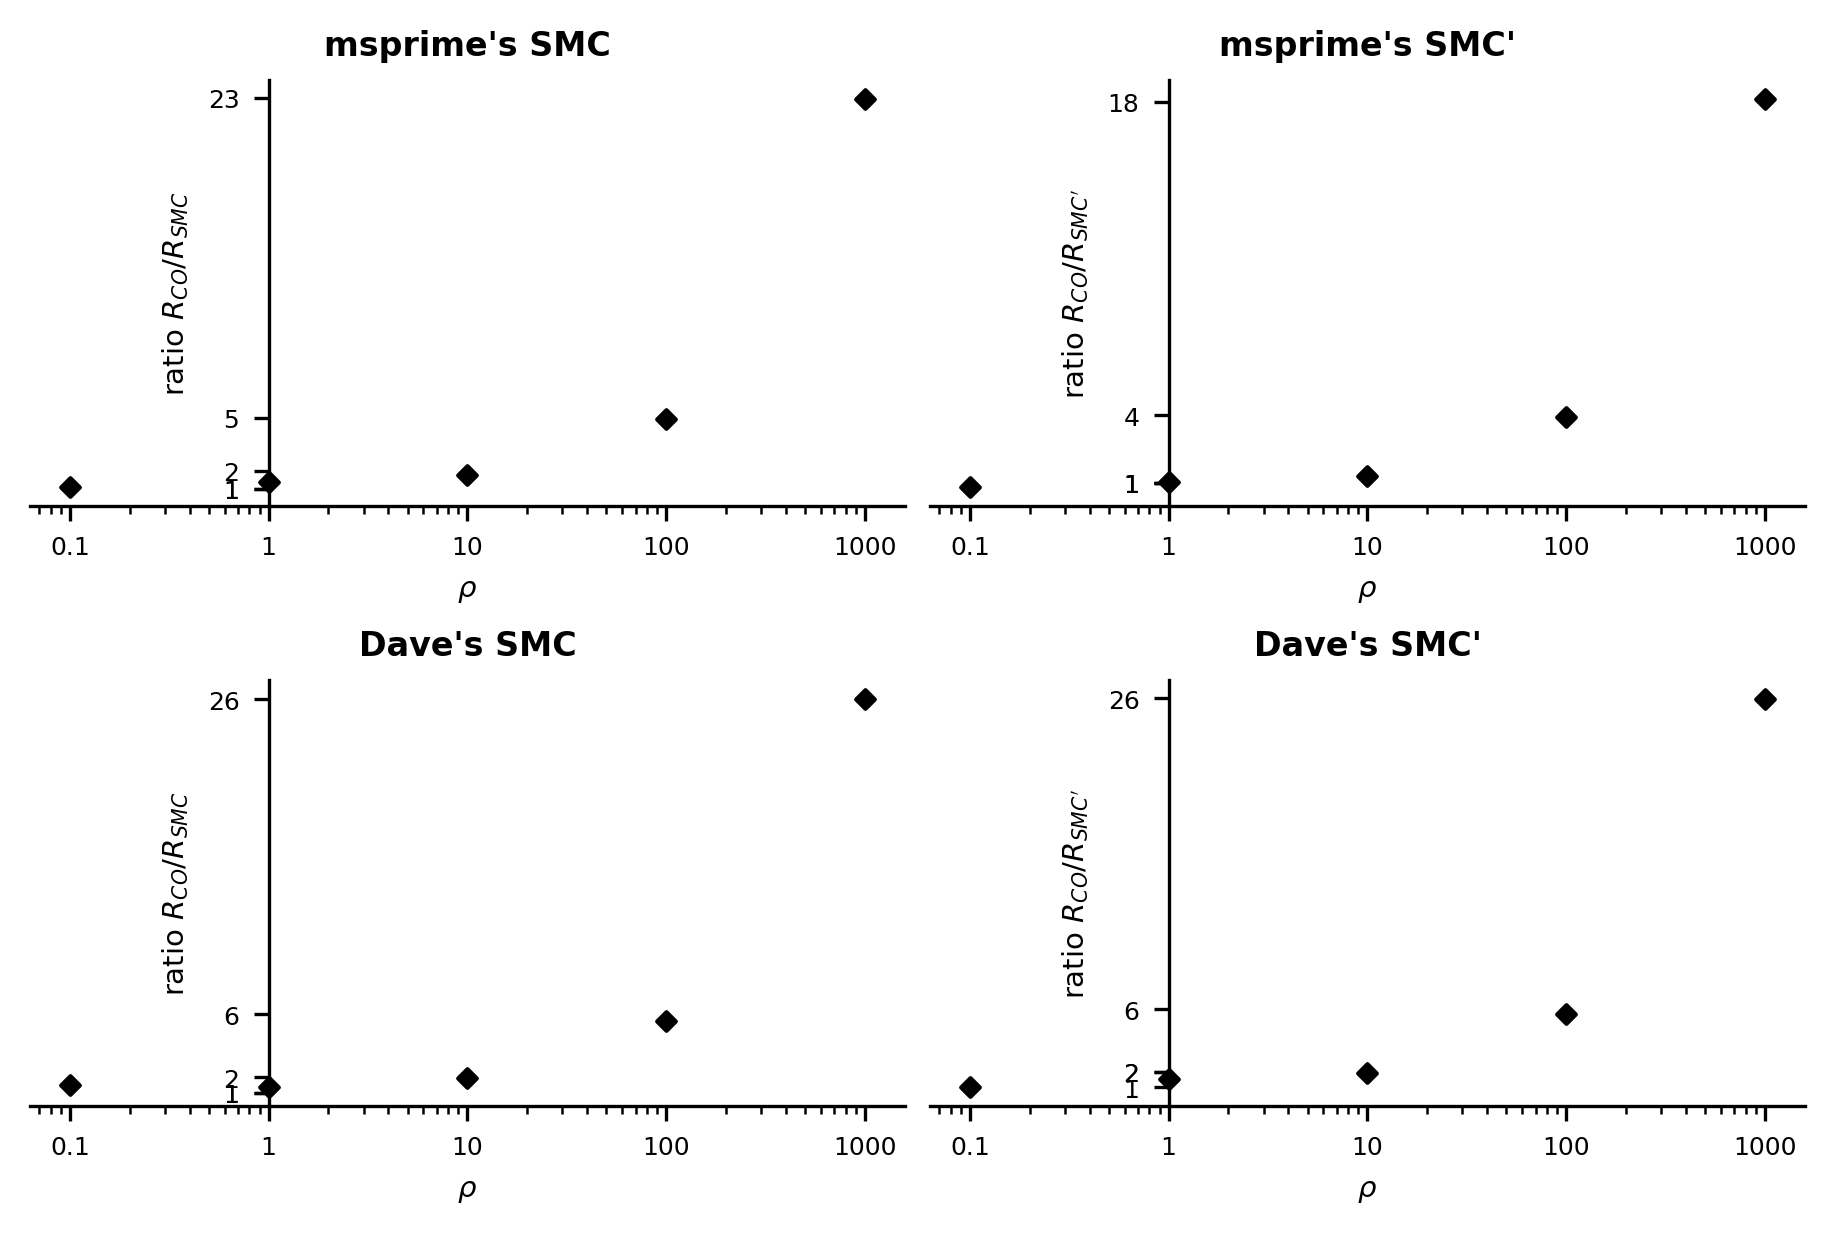

In [10]:
# Intialize figures and axes.
fig, axes = plt.subplots(
    2,
    2,
    figsize=(6, 4),
    sharex=False,
    sharey=False,
    dpi=300,
)
# Intialize a dictionary for plotting.
plot_dicc = {
    "msp_smc": {"title": "msprime's SMC", "y_lab": r"ratio $R_{CO} / R_{SMC}$"},
    "msp_smc_prime": {
        "title": "msprime's SMC'",
        "y_lab": r"""ratio $R_{CO} / R_{SMC'}$""",
    },
    "djp_smc": {"title": "Dave's SMC", "y_lab": r"ratio $R_{CO} / R_{SMC}$"},
    "djp_smc_prime": {
        "title": "Dave's SMC'",
        "y_lab": r"""ratio $R_{CO} / R_{SMC'}$""",
    },
}
# Intialize axes list.
ax_list = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
]
# Intialize the mean number of crossovers for the standard coalescent.
standard_mean_co = np.array([np.mean(R_dicc["standard"][rho]) for rho in R_rhos])
# For every key.
for i, key in enumerate(plot_dicc):
    # Unpack the row and column indicies.
    row, col = ax_list[i]
    # Compute the R ratio.
    R_ratio = standard_mean_co / np.array([np.mean(R_dicc[key][rho]) for rho in R_rhos])
    # Plot the the results.
    axes[row, col].scatter(
        R_rhos,
        R_ratio,
        color="black",
        marker="D",
        s=10,
    )
    # Set the subplot title.
    axes[row, col].set_title(plot_dicc[key]["title"], fontweight="bold", size=8)
    # Set the axes labels.
    axes[row, col].set_xlabel(r"$\rho$", size=7)
    axes[row, col].set_ylabel(plot_dicc[key]["y_lab"], size=7)
    # Move the left spine (y-axis bar) to x = 1.
    axes[row, col].spines["left"].set_position(("data", 1))
    # Set the x-axis scale.
    axes[row, col].set_xscale("log")
    # Set the y-axis ticks and tick labels.
    axes[row, col].set_yticks(np.round(R_ratio))
    axes[row, col].set_yticklabels([str(round(ratio)) for ratio in R_ratio], size=6)
    # Set the axes scale, ticks, and tick labels.
    axes[row, col].set_xticks(R_rhos)
    axes[row, col].set_xticklabels(
        [str(int(rho)) if rho.is_integer() else str(rho) for rho in R_rhos], size=6
    )
# Show the plot.
plt.show()

### $i^{th}$ Tree Height

__Note:__ the $i^{th}$ tree height results from `msprime` are in units of generations while my results are in coalescent units.

In [11]:
# Define a list of tree indicies.
tree_idx = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1])
# Intialize an lisy of populuation recombination rate values.
ith_rhos = np.array([1, 100])
# Intialize sample sizes.
ns = np.array([2, 3, 4, 5, 10, 20])
# Intialize dictionaries to store the results.
height_dicc = {}
width_dicc = {}
# For every model.
for model in model_dicc:
    # Intialize the subdictionaries.
    height_dicc[model] = {}
    width_dicc[model] = {}
    # For every sample size.
    for n in ns:
        # Intialize the subdictionaries.
        height_dicc[model][n] = {}
        width_dicc[model][n] = {}
        # For every population recombination rate.
        for rho in ith_rhos:
            # Load the ith tree height and width results.
            height_dicc[model][n][rho] = np.loadtxt(
                f"./data/{model}_tips_{n}_rho_{rho}_ith_tree_height.txt.gz"
            )
            width_dicc[model][n][rho] = np.loadtxt(
                f"./data/{model}_tips_{n}_rho_{rho}_ith_tree_width.txt.gz"
            )

In [12]:
# Intialize a dataframe dictionaries.
df_height = {
    r"Sampled Lineages $(n)$": [],
    r"Population Recombination Rate $(\rho)$": [],
    r"$i^{th}$ Tree": [],
    "msprime Standard Coalescent": [],
    "msprime's SMC": [],
    "msprime's SMC'": [],
    "Dave's SMC": [],
    "Dave's SMC'": [],
}
df_width = {
    r"Sampled Lineages $(n)$": [],
    r"Population Recombination Rate $(\rho)$": [],
    r"$i^{th}$ Tree": [],
    "msprime Standard Coalescent": [],
    "msprime's SMC": [],
    "msprime's SMC'": [],
    "Dave's SMC": [],
    "Dave's SMC'": [],
}
# For every sample size.
for n in ns:
    # For every population recombination rate.
    for rho in ith_rhos:
        # For every tree index.
        for idx in tree_idx:
            # If the ith tree is not the last tree index.
            if idx != -1:
                # Add one to account for 0-indexing.
                ith = int(idx + 1)
            # Else.
            else:
                # Denote that this is the last tree.
                ith = "last tree"
            # Update the dataframe dictionaries
            df_height[r"Sampled Lineages $(n)$"].append(n)
            df_height[r"Population Recombination Rate $(\rho)$"].append(rho)
            df_height[r"$i^{th}$ Tree"].append(ith)
            df_width[r"Sampled Lineages $(n)$"].append(n)
            df_width[r"Population Recombination Rate $(\rho)$"].append(rho)
            df_width[r"$i^{th}$ Tree"].append(ith)
            for model in model_dicc:
                # Update the dataframe dictionaries.
                df_height[model_dicc[model]].append(
                    np.nanmean(height_dicc[model][n][rho][:, idx])
                )
                df_width[model_dicc[model]].append(
                    np.nanmean(width_dicc[model][n][rho][:, idx])
                )
# Convert the dictionaries to data frames.
height_df = pd.DataFrame(data=df_height)
width_df = pd.DataFrame(data=df_width)

/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_86717/3886524242.py:46: RuntimeWarning: Mean of empty slice
  np.nanmean(height_dicc[model][n][rho][:, idx])
/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_86717/3886524242.py:49: RuntimeWarning: Mean of empty slice
  np.nanmean(width_dicc[model][n][rho][:, idx])


In [13]:
# Show the ith tree height results for 2 tips (E[tMRCA_2] = 1).
height_df[height_df[r"Sampled Lineages $(n)$"] == 2].set_index(
    [
        r"Sampled Lineages $(n)$",
        r"Population Recombination Rate $(\rho)$",
        r"$i^{th}$ Tree",
    ]
)

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                                
2                      1                                      1                                 2.018404   
                                                              2                                 3.317198   
                                                              3                                 4.108677   
                                                              4                                 4.343238   
                                                              5                                 5.693488   
                                                              6                                12.884196   
                                                              7                                      NaN   
                                                              8                                      NaN   
                                                              9                                      NaN   
                                                              10                                     NaN   
                                                              last tree                         2.048249   
                       100                                    1                                 1.971388   
                                                              2                                 2.845281   
                                                              3                                 3.192836   
                                                              4                                 3.407219   
                                                              5                                 3.478330   
                                                              6                                 3.462092   
                                                              7                                 3.488200   
                                                              8                                 3.575548   
                                                              9                                 3.537359   
                                                              10                                3.591970   
                                                              last tree                         1.917991   

                                                                             msprime's SMC  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                  
2                      1                                      1                   2.007709   
                                                              2                   3.482782   
                                                              3                   4.077427   
                                                              4                   4.909971   
                                                              5                   5.387720   
                                                              6                   4.204860   
                                                              7                   5.293092   
                                                              8                   2.768334   
                                                              9                        NaN   
                                                              10                       NaN   
                                                              last tree           1.985405   
                       100                                    1                   1.968526   
                                                              2                   2.956016   
                                                              3           

In [14]:
# Show the ith tree height results for 3 tips (E[tMRCA_3] = 1.333).
height_df[height_df[r"Sampled Lineages $(n)$"] == 3].set_index(
    [
        r"Sampled Lineages $(n)$",
        r"Population Recombination Rate $(\rho)$",
        r"$i^{th}$ Tree",
    ]
)

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                                
3                      1                                      1                                 2.670353   
                                                              2                                 3.527795   
                                                              3                                 4.185030   
                                                              4                                 4.388784   
                                                              5                                 4.348364   
                                                              6                                 4.568444   
                                                              7                                 4.769434   
                                                              8                                      NaN   
                                                              9                                      NaN   
                                                              10                                     NaN   
                                                              last tree                         2.669099   
                       100                                    1                                 2.557264   
                                                              2                                 3.170195   
                                                              3                                 3.390736   
                                                              4                                 3.590712   
                                                              5                                 3.665940   
                                                              6                                 3.756793   
                                                              7                                 3.732128   
                                                              8                                 3.734858   
                                                              9                                 3.889709   
                                                              10                                3.911460   
                                                              last tree                         2.652796   

                                                                             msprime's SMC  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                  
3                      1                                      1                   2.621821   
                                                              2                   3.838182   
                                                              3                   4.487600   
                                                              4                   4.802898   
                                                              5                   5.220627   
                                                              6                   5.851329   
                                                              7                   5.840525   
                                                              8                   5.012106   
                                                              9                   5.398579   
                                                              10                  5.398579   
                                                              last tree           2.697418   
                       100                                    1                   2.668540   
                                                              2                   3.474944   
                                                              3           

In [15]:
# Show the ith tree height results for 4 tips (E[tMRCA_4] = 1.5).
height_df[height_df[r"Sampled Lineages $(n)$"] == 5].set_index(
    [
        r"Sampled Lineages $(n)$",
        r"Population Recombination Rate $(\rho)$",
        r"$i^{th}$ Tree",
    ]
)

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                                
5                      1                                      1                                 3.067053   
                                                              2                                 3.523089   
                                                              3                                 4.090949   
                                                              4                                 4.391959   
                                                              5                                 4.820717   
                                                              6                                 5.036595   
                                                              7                                 5.099233   
                                                              8                                 3.266232   
                                                              9                                 1.850838   
                                                              10                                     NaN   
                                                              last tree                         3.066226   
                       100                                    1                                 3.119407   
                                                              2                                 3.454165   
                                                              3                                 3.565828   
                                                              4                                 3.762964   
                                                              5                                 3.917538   
                                                              6                                 3.885791   
                                                              7                                 3.994020   
                                                              8                                 3.947508   
                                                              9                                 4.081463   
                                                              10                                3.946205   
                                                              last tree                         3.207399   

                                                                             msprime's SMC  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                  
5                      1                                      1                   3.175277   
                                                              2                   3.946224   
                                                              3                   4.574301   
                                                              4                   4.584917   
                                                              5                   4.949008   
                                                              6                   5.417328   
                                                              7                   5.190011   
                                                              8                   4.814174   
                                                              9                   4.619400   
                                                              10                  4.852795   
                                                              last tree           3.212671   
                       100                                    1                   3.178149   
                                                              2                   3.539404   
                                                              3           

In [16]:
# Show the ith tree height results for 5 tips (E[tMRCA_5] = 1.6).
height_df[height_df[r"Sampled Lineages $(n)$"] == 5].set_index(
    [
        r"Sampled Lineages $(n)$",
        r"Population Recombination Rate $(\rho)$",
        r"$i^{th}$ Tree",
    ]
)

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                                
5                      1                                      1                                 3.067053   
                                                              2                                 3.523089   
                                                              3                                 4.090949   
                                                              4                                 4.391959   
                                                              5                                 4.820717   
                                                              6                                 5.036595   
                                                              7                                 5.099233   
                                                              8                                 3.266232   
                                                              9                                 1.850838   
                                                              10                                     NaN   
                                                              last tree                         3.066226   
                       100                                    1                                 3.119407   
                                                              2                                 3.454165   
                                                              3                                 3.565828   
                                                              4                                 3.762964   
                                                              5                                 3.917538   
                                                              6                                 3.885791   
                                                              7                                 3.994020   
                                                              8                                 3.947508   
                                                              9                                 4.081463   
                                                              10                                3.946205   
                                                              last tree                         3.207399   

                                                                             msprime's SMC  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                  
5                      1                                      1                   3.175277   
                                                              2                   3.946224   
                                                              3                   4.574301   
                                                              4                   4.584917   
                                                              5                   4.949008   
                                                              6                   5.417328   
                                                              7                   5.190011   
                                                              8                   4.814174   
                                                              9                   4.619400   
                                                              10                  4.852795   
                                                              last tree           3.212671   
                       100                                    1                   3.178149   
                                                              2                   3.539404   
                                                              3           

In [17]:
# Show the ith tree height results for 10 tips (E[tMRCA_10] = 1.8).
height_df[height_df[r"Sampled Lineages $(n)$"] == 10].set_index(
    [
        r"Sampled Lineages $(n)$",
        r"Population Recombination Rate $(\rho)$",
        r"$i^{th}$ Tree",
    ]
)

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                                
10                     1                                      1                                 3.590393   
                                                              2                                 3.898572   
                                                              3                                 4.283491   
                                                              4                                 4.834050   
                                                              5                                 5.338632   
                                                              6                                 5.238178   
                                                              7                                 5.017850   
                                                              8                                 5.426672   
                                                              9                                 5.082992   
                                                              10                                5.429790   
                                                              last tree                         3.640609   
                       100                                    1                                 3.486470   
                                                              2                                 3.604045   
                                                              3                                 3.772664   
                                                              4                                 3.831731   
                                                              5                                 3.856951   
                                                              6                                 3.886968   
                                                              7                                 3.918358   
                                                              8                                 3.993786   
                                                              9                                 4.029369   
                                                              10                                4.040709   
                                                              last tree                         3.613688   

                                                                             msprime's SMC  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                  
10                     1                                      1                   3.527461   
                                                              2                   4.026892   
                                                              3                   4.382450   
                                                              4                   4.693173   
                                                              5                   4.863518   
                                                              6                   5.108015   
                                                              7                   5.440259   
                                                              8                   5.690892   
                                                              9                   6.302713   
                                                              10                  7.663966   
                                                              last tree           3.615264   
                       100                                    1                   3.574679   
                                                              2                   3.829510   
                                                              3           

In [18]:
# Show the ith tree height results for 20 tips (E[tMRCA_20] = 1.9).
height_df[height_df[r"Sampled Lineages $(n)$"] == 20].set_index(
    [
        r"Sampled Lineages $(n)$",
        r"Population Recombination Rate $(\rho)$",
        r"$i^{th}$ Tree",
    ]
)

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                                
20                     1                                      1                                 3.834172   
                                                              2                                 3.985862   
                                                              3                                 4.149867   
                                                              4                                 4.401321   
                                                              5                                 4.539738   
                                                              6                                 4.818535   
                                                              7                                 4.858823   
                                                              8                                 5.071956   
                                                              9                                 5.685286   
                                                              10                                6.064009   
                                                              last tree                         3.877881   
                       100                                    1                                 3.729986   
                                                              2                                 3.913677   
                                                              3                                 4.021713   
                                                              4                                 4.093863   
                                                              5                                 4.166559   
                                                              6                                 4.221340   
                                                              7                                 4.164213   
                                                              8                                 4.109450   
                                                              9                                 4.107422   
                                                              10                                4.108452   
                                                              last tree                         3.856641   

                                                                             msprime's SMC  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i^{th}$ Tree                  
20                     1                                      1                   3.915645   
                                                              2                   4.225901   
                                                              3                   4.382494   
                                                              4                   4.710586   
                                                              5                   4.866974   
                                                              6                   5.033186   
                                                              7                   5.229252   
                                                              8                   5.710109   
                                                              9                   6.174840   
                                                              10                  6.307325   
                                                              last tree           3.856662   
                       100                                    1                   3.789862   
                                                              2                   3.891724   
                                                              3           

In [19]:
# Define a function to compute the expected tree height and variance.
def e_v_height(n):
    # E[tMRCA].
    e_height = 2 * (1 - (1 / n))
    # V[tMRCA].
    v_height = (sum((1 / i**2) for i in range(2, n + 2)) * 8) - (
        4 * ((1 - (1 / n)) ** 2)
    )
    return e_height, v_height


# Define a function to compute the absolute and relative error
def error(obs, truth):
    # Absolute error.
    ae = abs(obs - truth)
    # Relative error.
    re = ae / abs(truth)
    return ae, re

In [20]:
# Intialize a dataframe dictionaries.
df_e_height = {
    r"Sampled Lineages $(n)$": [],
    r"Population Recombination Rate $(\rho)$": [],
    r"$i^{th}$ Tree": [],
    "Model": [],
    r"$E[tMRCA]$": [],
    r"$\mu_{tMRCA}$": [],
    r"$\epsilon$": [],
    r"$\eta$": [],
}
df_v_height = {
    r"Sampled Lineages $(n)$": [],
    r"Population Recombination Rate $(\rho)$": [],
    r"$i^{th}$ Tree": [],
    "Model": [],
    r"$V[tMRCA]$": [],
    r"$\sigma^{2}_{tMRCA}$": [],
    r"$\epsilon$": [],
    r"$\eta$": [],
}
# For every sample size.
for n in ns:
    # For every population recombination rate.
    for rho in ith_rhos:
        # For every tree index.
        for idx in [0, -1]:
            # If the ith tree is not the last tree index.
            if idx == 0:
                # Denote that this is the first tree.
                ith = "first tree"
            # Else.
            else:
                # Denote that this is the last tree.
                ith = "last tree"
            # Compute the expeted height and variance.
            exp, var = e_v_height(n=n)
            # For each model.
            for model in ["djp_smc", "djp_smc_prime"]:
                # Update the dataframe dictionaries.
                df_e_height[r"Sampled Lineages $(n)$"].append(n)
                df_e_height[r"Population Recombination Rate $(\rho)$"].append(rho)
                df_e_height[r"$i^{th}$ Tree"].append(ith)
                df_e_height["Model"].append(model_dicc[model])
                df_v_height[r"Sampled Lineages $(n)$"].append(n)
                df_v_height[r"Population Recombination Rate $(\rho)$"].append(rho)
                df_v_height[r"$i^{th}$ Tree"].append(ith)
                df_v_height["Model"].append(model_dicc[model])
                # Compute the sample mean and varaince.
                mu = np.mean(height_dicc[model][n][rho][:, idx])
                sigma_sqaured = np.var(height_dicc[model][n][rho][:, idx])
                # Compute the abolsute and relative error for both the mean and variance.
                e_ae, e_re = error(obs=mu, truth=exp)
                v_ae, v_re = error(obs=sigma_sqaured, truth=var)
                # Update the dataframe dictionaries.
                df_e_height[r"$E[tMRCA]$"].append(exp)
                df_e_height[r"$\mu_{tMRCA}$"].append(mu)
                df_e_height[r"$\epsilon$"].append(e_ae)
                df_e_height[r"$\eta$"].append(e_re)
                df_v_height[r"$V[tMRCA]$"].append(var)
                df_v_height[r"$\sigma^{2}_{tMRCA}$"].append(sigma_sqaured)
                df_v_height[r"$\epsilon$"].append(v_ae)
                df_v_height[r"$\eta$"].append(v_re)
# Convert the dictionaries to data frames.
avg_height_df = pd.DataFrame(data=df_e_height)
var_height_df = pd.DataFrame(data=df_v_height)

In [21]:
# Show the first and last mean tree height qc results.
avg_height_df.set_index(
    [
        r"Sampled Lineages $(n)$",
        r"Population Recombination Rate $(\rho)$",
        "Model",
        r"$i^{th}$ Tree",
    ]
)

$E[tMRCA]$  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ Model       $i^{th}$ Tree               
2                      1                                      Dave's SMC  first tree       1.000000   
                                                              Dave's SMC' first tree       1.000000   
                                                              Dave's SMC  last tree        1.000000   
                                                              Dave's SMC' last tree        1.000000   
                       100                                    Dave's SMC  first tree       1.000000   
                                                              Dave's SMC' first tree       1.000000   
                                                              Dave's SMC  last tree        1.000000   
                                                              Dave's SMC' last tree        1.000000   
3                      1                                      Dave's SMC  first tree       1.333333   
                                                              Dave's SMC' first tree       1.333333   
                                                              Dave's SMC  last tree        1.333333   
                                                              Dave's SMC' last tree        1.333333   
                       100                                    Dave's SMC  first tree       1.333333   
                                                              Dave's SMC' first tree       1.333333   
                                                              Dave's SMC  last tree        1.333333   
                                                              Dave's SMC' last tree        1.333333   
4                      1                                      Dave's SMC  first tree       1.500000   
                                                              Dave's SMC' first tree       1.500000   
                                                              Dave's SMC  last tree        1.500000   
                                                              Dave's SMC' last tree        1.500000   
                       100                                    Dave's SMC  first tree       1.500000   
                                                              Dave's SMC' first tree       1.500000   
                                                              Dave's SMC  last tree        1.500000   
                                                              Dave's SMC' last tree        1.500000   
5                      1                                      Dave's SMC  first tree       1.600000   
                                                              Dave's SMC' first tree       1.600000   
                                                              Dave's SMC  last tree        1.600000   
                                                              Dave's SMC' last tree        1.600000   
                       100                                    Dave's SMC  first tree       1.600000   
                                                              Dave's SMC' first tree       1.600000   
                                                              Dave's SMC  last tree        1.600000   
                                                              Dave's SMC' last tree        1.600000   
10                     1                                      Dave's SMC  first tree       1.800000   
                                                              Dave's SMC' first tree       1.800000   
                                                              Dave's SMC  last tree        1.800000   
                                                              Dave's SMC' last tree        1.800000   
                       100                                    Dave's SMC  first tree       1.800000   
                                                              Dave's SMC

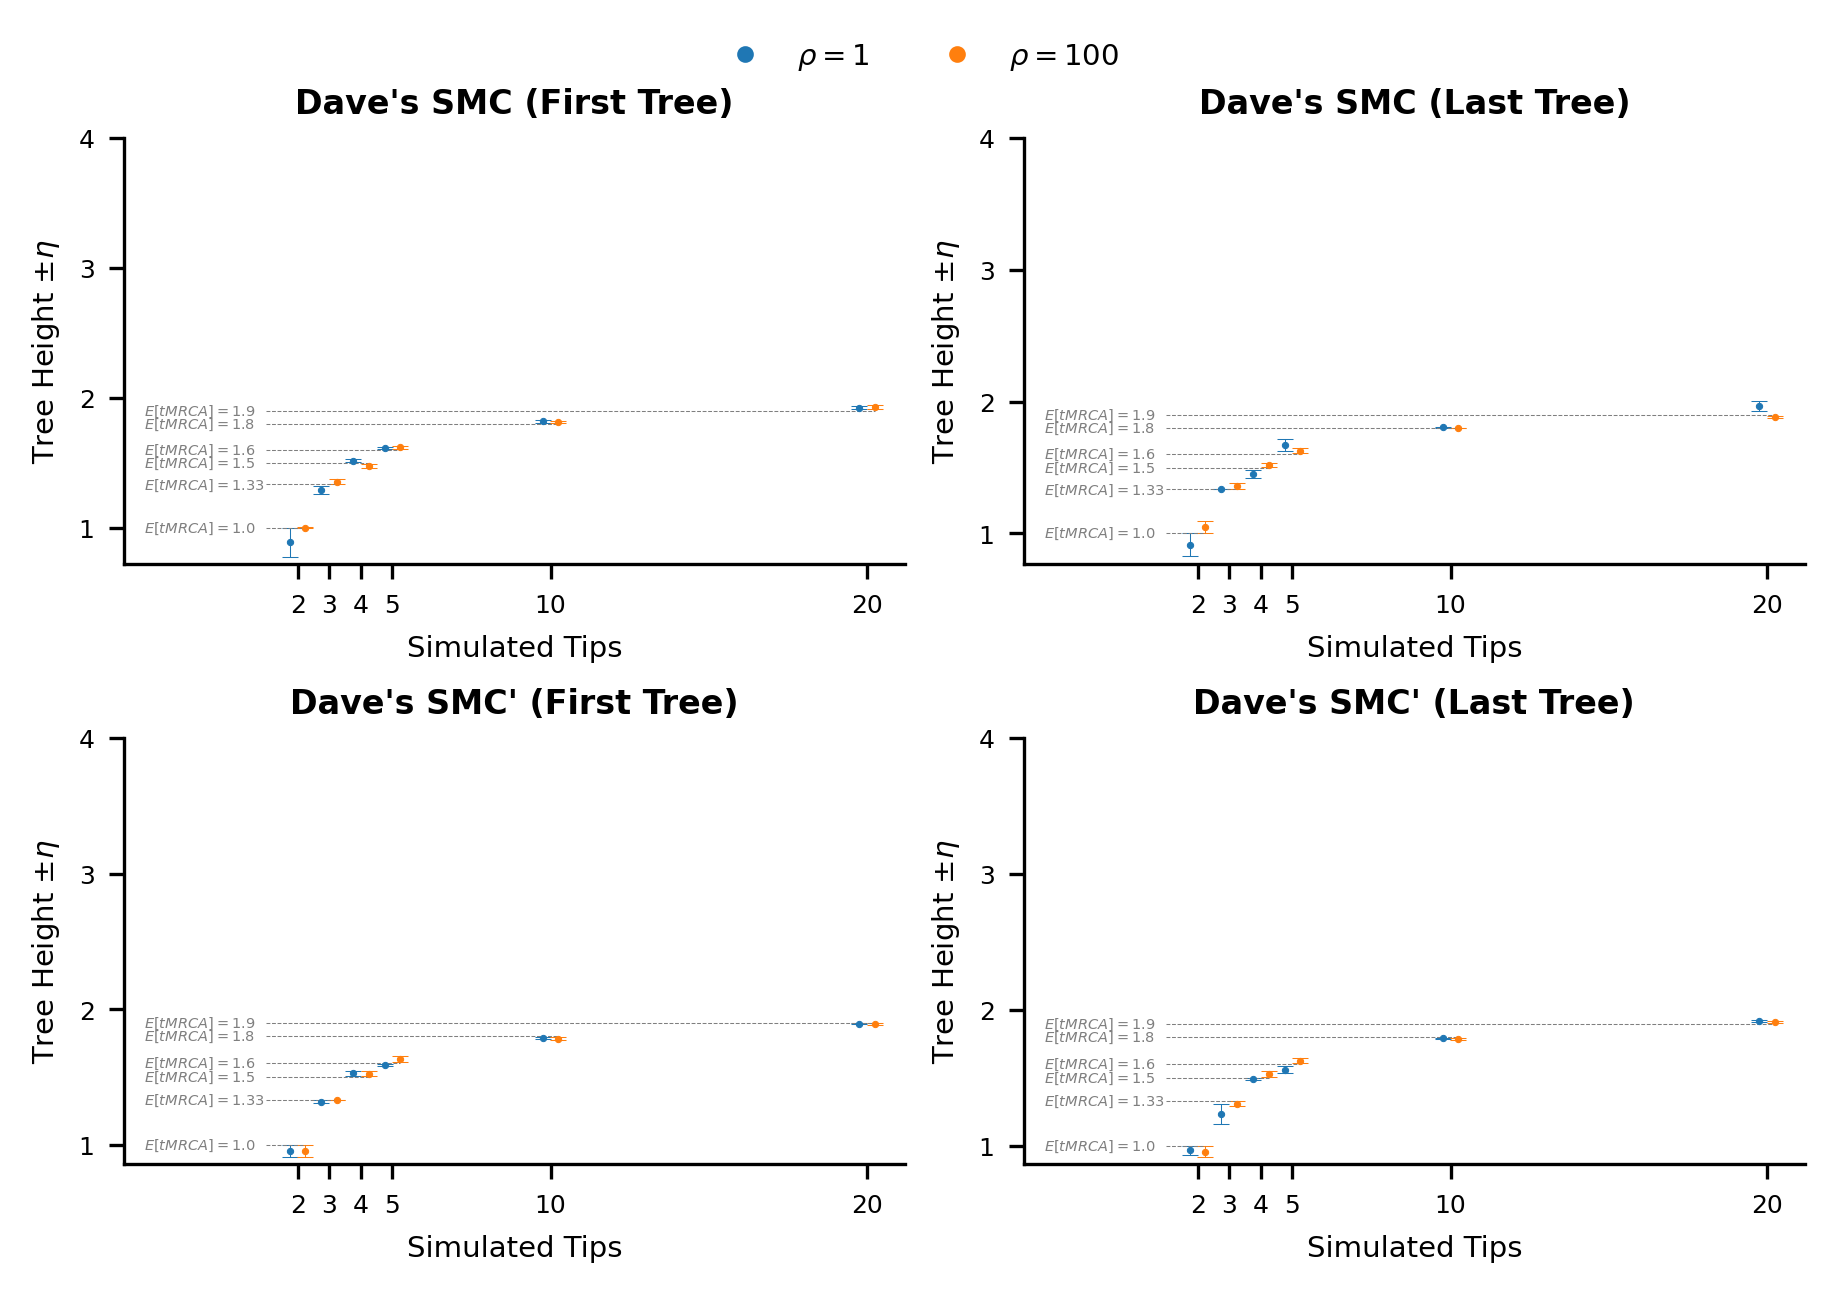

In [22]:
# Intialize figures and axes.
fig, axes = plt.subplots(
    2,
    2,
    figsize=(6, 4),
    sharex=False,
    sharey=False,
    dpi=300,
)
# Intialize color and shift lists.
colors = ["tab:blue", "tab:orange"]
shifts = [-0.25, 0.25]
# For each model.
for i, model in enumerate(["Dave's SMC", "Dave's SMC'"]):
    # Intialize the model condtion.
    c_model = avg_height_df["Model"] == model
    # For each tree.
    for j, tree in enumerate(["first tree", "last tree"]):
        # Intialize the tree condtion.
        c_tree = avg_height_df[r"$i^{th}$ Tree"] == tree
        # For each rho.
        for k, rho in enumerate([1, 100]):
            # Intialize the rho condition.
            c_rho = avg_height_df[r"Population Recombination Rate $(\rho)$"] == rho
            # Subset the dataframe.
            sub_df = avg_height_df[c_model & c_tree & c_rho]
            # # Plot the results.
            axes[i, j].errorbar(
                (ns + shifts[k]),
                sub_df[r"$\mu_{tMRCA}$"].values,
                yerr=sub_df[r"$\eta$"].values,
                fmt=".",
                color=colors[k],
                ms=3,
                lw=0.25,
                capsize=2,
                mew=0.25,
            )
        # For every expected height.
        for l, e_height in enumerate(sub_df[r"$E[tMRCA]$"].values):
            # Plot the expected values.
            axes[i, j].plot(
                [1, (ns[l] + shifts[k])],
                [e_height, e_height],
                color="tab:gray",
                linestyle="dashed",
                linewidth=0.25,
            )
            # Add a label.
            axes[i, j].text(
                x=-2.85,
                y=e_height,
                s=f"$E[tMRCA] = {round(e_height, 2)}$",
                va="center",
                color="tab:gray",
                size=3.5,
            )
        # Plot the subplot title
        axes[i, j].set_title(f"{model} ({tree.title()})", fontweight="bold", size=8)
        # Set the axes titles.
        axes[i, j].set_xlabel("Simulated Tips", size=7)
        axes[i, j].set_ylabel(r"Tree Height $\pm \eta$", size=7)
        # Set the axes ticks.
        axes[i, j].set_xticks(ns)
        axes[i, j].set_xticklabels(ns.astype(str), size=6)
        axes[i, j].set_yticks(np.arange(1, 5))
        axes[i, j].set_yticklabels(np.arange(1, 5).astype(str), size=6)
        # Set the axes limits.
        axes[i, j].set_xlim(left=-3.5)
# Construct the legend.
legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="tab:blue",
        linestyle="none",
        markersize=3,
        label=r"$\rho = 1$",
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="tab:orange",
        linestyle="none",
        markersize=3,
        label=r"$\rho = 100$",
    ),
]
fig.legend(
    handles=legend_elements,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    frameon=False,
    fontsize=7,
)
# Show the plot.
plt.show()

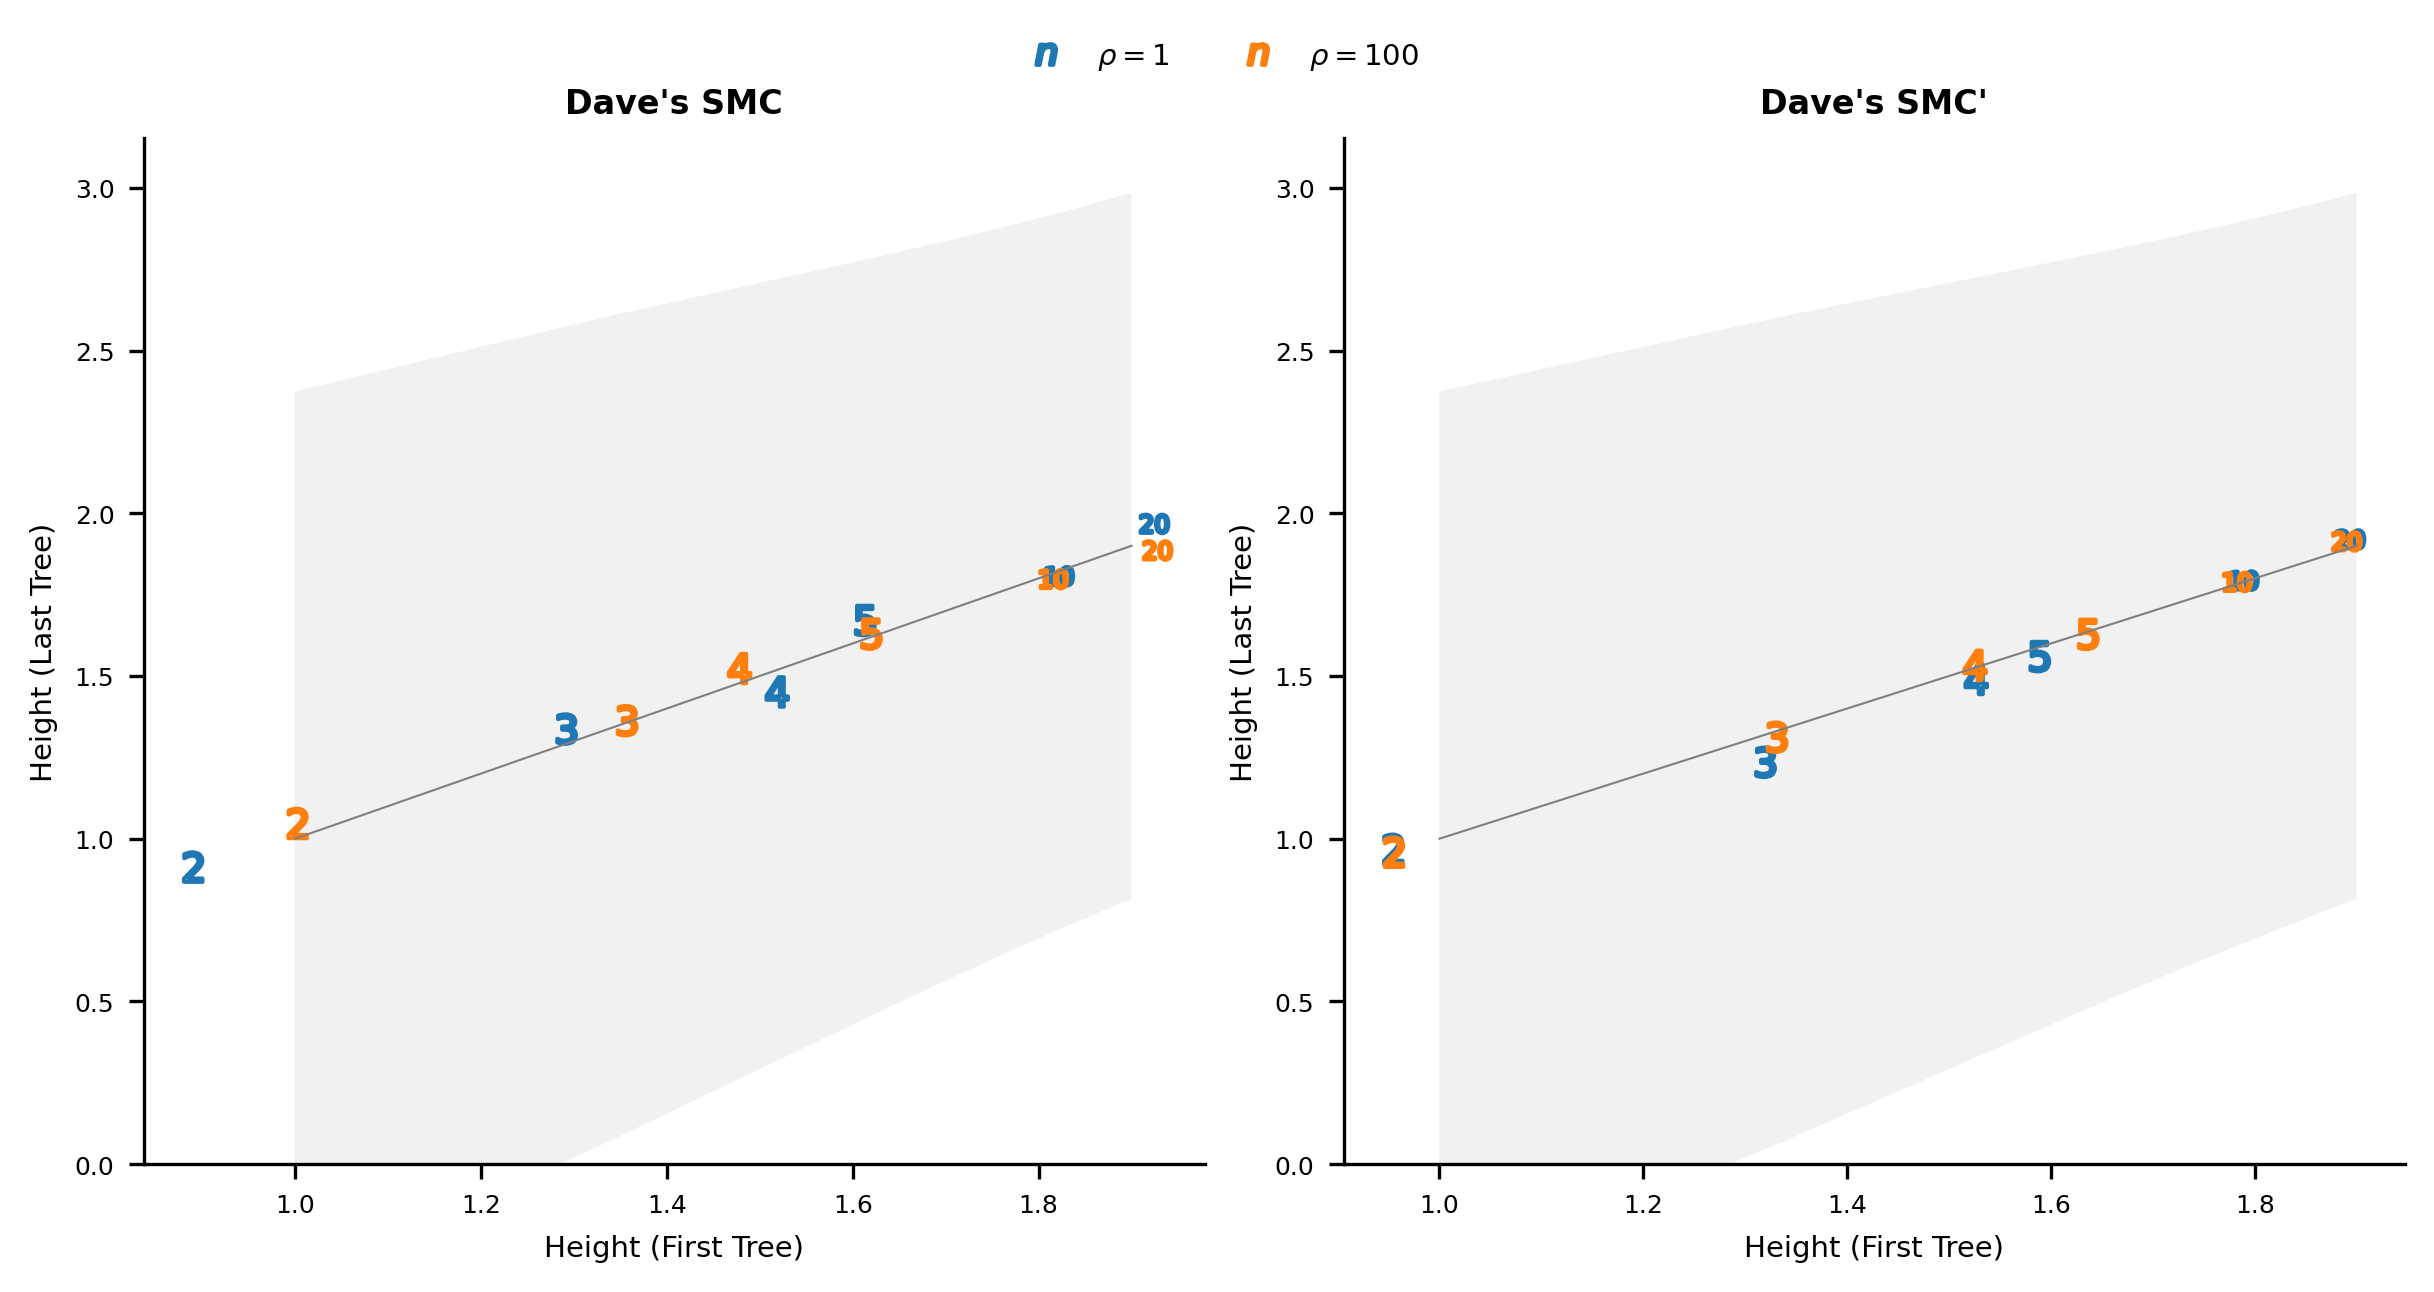

In [30]:
# Intialize figures and axes.
fig, axes = plt.subplots(
    1,
    2,
    figsize=(8, 4),
    sharex=False,
    sharey=False,
    dpi=300,
)
# Intialize a color list.
colors = ["tab:blue", "tab:orange"]
# Intialize lists for the expected values and variance.
e_heights = []
v_heights = []
# For every tip from 2 to 20.
for n in range(2, 21):
    # Compute the expected value and variance.
    exp, var = e_v_height(n=n)
    # Update the lists.
    e_heights.append(exp)
    v_heights.append(var)
# For each model.
for i, model in enumerate(["Dave's SMC", "Dave's SMC'"]):
    # Intialize the model condtion.
    c_model = avg_height_df["Model"] == model
    # Plot the expected values and variance.
    axes[i].plot(e_heights, e_heights, color="tab:gray", lw=0.5)
    axes[i].fill_between(
        e_heights,
        np.array(e_heights) - np.sqrt(np.array(v_heights)),
        np.array(e_heights) + np.sqrt(np.array(v_heights)),
        color="tab:gray",
        alpha=0.1,
        edgecolor="none",
    )
    # For each rho.
    for j, rho in enumerate([1, 100]):
        # Intialize the rho condition.
        c_rho = avg_height_df[r"Population Recombination Rate $(\rho)$"] == rho
        # Intialize the tree condtions.
        c_first = avg_height_df[r"$i^{th}$ Tree"] == "first tree"
        c_last = avg_height_df[r"$i^{th}$ Tree"] == "last tree"
        # Subset the dataframe.
        first_df = avg_height_df[c_model & c_first & c_rho]
        last_df = avg_height_df[c_model & c_last & c_rho]
        # For every sample size.
        for k, n in enumerate(ns):
            # Plot the results.
            axes[i].scatter(
                first_df[r"$\mu_{tMRCA}$"].values[k],
                last_df[r"$\mu_{tMRCA}$"].values[k],
                color=colors[j],
                marker=f"${int(n)}$",
                s=50,
                facecolor="none",
            )
    # Plot the subplot title
    axes[i].set_title(f"{model}", fontweight="bold", size=8)
    # Set the axes titles.
    axes[i].set_xlabel("Height (First Tree)", size=7)
    axes[i].set_ylabel("Height (Last Tree)", size=7)
    # Set tick label size for both x and y axes
    axes[i].tick_params(axis="both", which="major", labelsize=6)
    axes[i].set_ylim(bottom=0)
# Construct the legend.
legend_elements = [
    Line2D(
        [0],
        [0],
        marker=r"$n$",
        color="tab:blue",
        linestyle="none",
        markersize=5,
        label=r"$\rho = 1$",
    ),
    Line2D(
        [0],
        [0],
        marker=r"$n$",
        color="tab:orange",
        linestyle="none",
        markersize=5,
        label=r"$\rho = 100$",
    ),
]
fig.legend(
    handles=legend_elements,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    frameon=False,
    fontsize=7,
)
# Show the plot.
plt.show()

In [24]:
# Show the first and last variance in tree height qc results.
var_height_df.set_index(
    [
        r"Sampled Lineages $(n)$",
        r"Population Recombination Rate $(\rho)$",
        "Model",
        r"$i^{th}$ Tree",
    ]
)

$V[tMRCA]$  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ Model       $i^{th}$ Tree               
2                      1                                      Dave's SMC  first tree       1.888889   
                                                              Dave's SMC' first tree       1.888889   
                                                              Dave's SMC  last tree        1.888889   
                                                              Dave's SMC' last tree        1.888889   
                       100                                    Dave's SMC  first tree       1.888889   
                                                              Dave's SMC' first tree       1.888889   
                                                              Dave's SMC  last tree        1.888889   
                                                              Dave's SMC' last tree        1.888889   
3                      1                                      Dave's SMC  first tree       1.611111   
                                                              Dave's SMC' first tree       1.611111   
                                                              Dave's SMC  last tree        1.611111   
                                                              Dave's SMC' last tree        1.611111   
                       100                                    Dave's SMC  first tree       1.611111   
                                                              Dave's SMC' first tree       1.611111   
                                                              Dave's SMC  last tree        1.611111   
                                                              Dave's SMC' last tree        1.611111   
4                      1                                      Dave's SMC  first tree       1.458889   
                                                              Dave's SMC' first tree       1.458889   
                                                              Dave's SMC  last tree        1.458889   
                                                              Dave's SMC' last tree        1.458889   
                       100                                    Dave's SMC  first tree       1.458889   
                                                              Dave's SMC' first tree       1.458889   
                                                              Dave's SMC  last tree        1.458889   
                                                              Dave's SMC' last tree        1.458889   
5                      1                                      Dave's SMC  first tree       1.371111   
                                                              Dave's SMC' first tree       1.371111   
                                                              Dave's SMC  last tree        1.371111   
                                                              Dave's SMC' last tree        1.371111   
                       100                                    Dave's SMC  first tree       1.371111   
                                                              Dave's SMC' first tree       1.371111   
                                                              Dave's SMC  last tree        1.371111   
                                                              Dave's SMC' last tree        1.371111   
10                     1                                      Dave's SMC  first tree       1.224258   
                                                              Dave's SMC' first tree       1.224258   
                                                              Dave's SMC  last tree        1.224258   
                                                              Dave's SMC' last tree        1.224258   
                       100                                    Dave's SMC  first tree       1.224258   
                                                              Dave's SMC

## `smclib.py` Code for Debugging

In [31]:
# Intialize a node class.
class Node:
    # Intialize the node.
    def __init__(
        self, node_id, age, node_type, parent=None, l_child=None, r_child=None
    ):
        """
        Node Types
            - 0: leaf node
            - 1: coalescent event node
            - 2: visibile recombination
            - 3: hidden recombination
        """
        self.node_id = node_id
        self.age = age
        self.node_type = node_type
        self.parent = parent
        self.l_child = l_child
        self.r_child = r_child
        self.parent_dist = None
        self.l_child_dist = None
        self.r_child_dist = None

    # Define a deep copy method.
    def __deepcopy__(self, memo):
        """
        Return a deepy copy of an isntance of the Node class.
        """
        # Avoid infinite loops
        if id(self) in memo:
            return memo[id(self)]
        # Create a shallow copy of the current node
        copied_node = copy.copy(self)
        memo[id(self)] = copied_node
        # Deep copy children and parent
        copied_node.parent = copy.deepcopy(self.parent, memo)
        copied_node.l_child = copy.deepcopy(self.l_child, memo)
        copied_node.r_child = copy.deepcopy(self.r_child, memo)
        return copied_node

    # Define a method to check if a node is a leaf.
    def is_leaf(self):
        """
        True if the node is a leaf, False otherwise.
        """
        return self.node_type == 0

    # Define a method to compute the distance to the children.
    def dist_to_children(self):
        """
        Compute the distance from the current node to its children.
        """
        if self.l_child is not None:
            self.l_child_dist = self.age - self.l_child.age
        if self.r_child is not None:
            self.r_child_dist = self.age - self.r_child.age

    # Define a method to compute the distance to the parent node.
    def dist_to_parent(self):
        """
        Compute the distance from the current node to its parent.
        """
        if self.parent is not None:
            self.parent_dist = self.parent.age - self.age

    # Define a function to initialize distance to parent and children nodes.
    def init_dists(self):
        """
        Intialize the distances to the parent and children nodes.
        """
        self.dist_to_parent()
        self.dist_to_children()


# Intialize a tree class.
class Tree:
    # Intialize the tree.
    def __init__(self, left=0.0, right=1.0):
        self.left = left
        self.right = right
        self.root = None
        self.length = None
        self.next_node_id = None
        self.next_rec_id = -1
        self.nodes = {}
        self.edges = {}
        self.upper_bounds = None
        self.recomb_node = None
        self.coal_node = None

    def __deepcopy__(self, memo):
        """
        Return a deepy copy of an isntance of the Tree class.
        """
        # Avoid infinite loops.
        if id(self) in memo:
            return memo[id(self)]
        # Create a shallow copy of the tree.
        copied_tree = copy.copy(self)
        memo[id(self)] = copied_tree
        # Deep copy nodes and edges.
        copied_tree.nodes = copy.deepcopy(self.nodes, memo)
        copied_tree.edges = copy.deepcopy(self.edges, memo)
        # Deep copy unary nodes.
        copied_tree.recomb_node = copy.deepcopy(self.recomb_node, memo)
        copied_tree.coal_node = copy.deepcopy(self.coal_node, memo)
        return copied_tree

    # Define a method to add a node to the tree.
    def add_node(self, node):
        """
        Add a new node to the tree.
        """
        self.nodes[node.node_id] = node

    # Define a method to remove a node from the tree.
    def rmv_node(self, node):
        """
        Remove a new node to the tree.
        """
        del self.nodes[node.node_id]

    # Define a method to intialize node distances.
    def init_branch_lengths(self):
        """
        Intialize all the branch lengths for the current tree.
        """
        # For every node.
        for node_id in self.nodes:
            # Intialize branch lengths.
            self.nodes[node_id].init_dists()

    # Define a method to intialize the edges on a tree.
    def init_edges(self):
        """
        Intialize all the edges on the current tree.
        """
        # Intialize variables.
        i = 0
        Lx = 0
        upper_bounds = []
        # For every node.
        for node in self.nodes:
            # If the node is not a leaf.
            if not self.nodes[node].is_leaf():
                # Record the interval's upper bound.
                upper_bounds.append(self.nodes[node].age)
                # Intialize the edge for parent -> left child.
                self.edges[i] = {}
                self.edges[i]["parent"] = self.nodes[node].node_id
                self.edges[i]["child"] = self.nodes[node].l_child.node_id
                self.edges[i]["upper"] = self.nodes[node].age
                self.edges[i]["lower"] = self.nodes[node].l_child.age
                self.edges[i]["length"] = self.nodes[node].l_child_dist
                i += 1
                Lx += self.nodes[node].l_child_dist
                # Intialize the edge for parent -> right child.
                self.edges[i] = {}
                self.edges[i]["parent"] = self.nodes[node].node_id
                self.edges[i]["child"] = self.nodes[node].r_child.node_id
                self.edges[i]["upper"] = self.nodes[node].age
                self.edges[i]["lower"] = self.nodes[node].r_child.age
                self.edges[i]["length"] = self.nodes[node].r_child_dist
                i += 1
                Lx += self.nodes[node].r_child_dist
        # Set the tree properties.
        self.upper_bounds = sorted(upper_bounds)
        self.length = Lx

    # Define a method to find the root node
    def find_root(self):
        """
        Determine the root node on the current tree.
        """
        root_node = max(self.nodes, key=lambda k: self.nodes[k].age)
        self.root = root_node

    # Define a method to reconcile the recoal and associated nodes.
    def perform_spr(
        self,
        broken_node,
        inherited_node,
        lonely_node,
        below_node,
        recoal_node,
        root_node,
    ):
        """
        Perform an SPR operation on the current tree.
        """
        # Intialize the new root.
        new_root = None

        ## [1] The broken and below nodes are the root node. ##
        if (
            root_node.node_id == broken_node.node_id
            and root_node.node_id == below_node.node_id
        ):
            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, lonely node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = lonely_node
            # Point the children: {inherited node, lonely node} to the recoal node.
            inherited_node.parent = recoal_node
            lonely_node.parent = recoal_node
            # Set recoal node as the new root.
            new_root = recoal_node

        ## [2] The broken node is the below node and the root node is unique. ##
        elif (
            broken_node.node_id == below_node.node_id
            and broken_node.node_id != root_node.node_id
        ):
            # Reconcile the recoal node's parent node. #
            # Set the parent of the coal node as the parent of the recoal node.
            recoal_node.parent = self.coal_node.parent
            # If the left child of the parent is the broken/below node.
            if recoal_node.parent.l_child.node_id == below_node.node_id:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.l_child = recoal_node
            # Else the right child of the parent is the below node.
            else:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.r_child = recoal_node

            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, lonely node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = lonely_node
            # Point the children: {inherited node, lonely node} to the recoal node.
            inherited_node.parent = recoal_node
            lonely_node.parent = recoal_node

        ## [3] The broken node is the root node and the below node is the lonely node. ##
        elif (
            broken_node.node_id == root_node.node_id
            and below_node.node_id == lonely_node.node_id
        ):
            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, below node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = below_node
            # Point the children: {inherited node, below node} to the recoal node.
            inherited_node.parent = recoal_node
            below_node.parent = recoal_node
            # Set recoal node as the new root.
            new_root = recoal_node

        ## [4] The broken node is the root node and the below and lonely nodes are unique. ##
        elif (
            broken_node.node_id == root_node.node_id
            and below_node.node_id != lonely_node.node_id
        ):
            # Reconcile the recoal node's parent node. #
            # Set the parent of the coal node as the parent of the recoal node.
            recoal_node.parent = self.coal_node.parent
            # If the left child of the parent is the below node.
            if recoal_node.parent.l_child.node_id == below_node.node_id:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.l_child = recoal_node
            # Else the right child of the parent is the below node.
            else:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.r_child = recoal_node

            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, below node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = below_node
            # Point the children: {inherited node, below node} to the recoal node.
            inherited_node.parent = recoal_node
            below_node.parent = recoal_node

            # Reconcile the lonely node. #
            # Set the lonely node as the new root.
            lonely_node.parent = None
            new_root = lonely_node

        ## [5] The below node is the root node and the broken node is unique. ##
        elif (
            below_node.node_id == root_node.node_id
            and broken_node.node_id != root_node.node_id
        ):
            # Reconcile the lonely node. #
            # Set the parent of the broken node as the new parent of the lonely node.
            lonely_node.parent = broken_node.parent
            # If the left child of the parent is the broken node.
            if lonely_node.parent.l_child.node_id == broken_node.node_id:
                # Replace the broken node with the lonely node in the children set.
                lonely_node.parent.l_child = lonely_node
            # Else the right child of is the broken node.
            else:
                # Replace the broken node with the lonely node in the children set.
                lonely_node.parent.r_child = lonely_node

            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, below node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = below_node
            # Point the children: {inherited node, below node} to the recoal node.
            inherited_node.parent = recoal_node
            below_node.parent = recoal_node
            # Set recoal node as the new root.
            new_root = recoal_node

        ## [6] The broken node, below node, and root node are all unique, and the below node is the lonely node. ##
        elif (
            broken_node.node_id != root_node.node_id
            and below_node.node_id == lonely_node.node_id
        ):
            # Reconcile the recoal node's parent node. #
            # Set the parent of the broken node as the parent of the recoal node.
            recoal_node.parent = broken_node.parent
            # If the left child of the parent is the broken node.
            if recoal_node.parent.l_child.node_id == broken_node.node_id:
                # Replace the broken node with the recoal node in the children set.
                recoal_node.parent.l_child = recoal_node
            # Else the right child of the parent is the broken node.
            else:
                # Replace the broken node with the recoal node in the children set.
                recoal_node.parent.r_child = recoal_node

            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, below node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = below_node
            # Point the children: {inherited node, below node} to the recoal node.
            inherited_node.parent = recoal_node
            below_node.parent = recoal_node

        ## [7] All nodes are unique. ##
        else:
            # Reconcile the lonely node. #
            # Set the parent of the broken node as the parent of the lonely node.
            lonely_node.parent = broken_node.parent
            # If the left child of is the broken node.
            if lonely_node.parent.l_child.node_id == broken_node.node_id:
                # Replace the broken node with the lonely node in the children set.
                lonely_node.parent.l_child = lonely_node
            # Else the right child of the below node is the broken node.
            else:
                # Replace the broken node with the lonely node in the children set.
                lonely_node.parent.r_child = lonely_node

            # Reconcile the recoal node's parent node. #
            # Set the parent of the coal node as the parent of the recoal node.
            recoal_node.parent = self.coal_node.parent
            # If the left child of the parent is the below node.
            if recoal_node.parent.l_child.node_id == below_node.node_id:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.l_child = recoal_node
            # Else the right child of the parent is the below node.
            else:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.r_child = recoal_node

            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, below node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = below_node
            # Point the children: {inherited node, below node} to the recoal node.
            inherited_node.parent = recoal_node
            below_node.parent = recoal_node

        ## Tie up the new tree ##
        # Prune the broken node from the tree.
        self.rmv_node(broken_node)
        # Graft the recoal node to the tree.
        self.add_node(recoal_node)
        # Intialize branch lengths for the new tree.
        self.init_branch_lengths()
        # Intialize the edges for the new tree.
        self.init_edges()
        # Intialize the next node ids for the new tree.
        self.init_next_node_id()
        # If we already know the new root node.
        if new_root is not None:
            # Intialize the new root.
            self.root = new_root.node_id
        # Else, we do not know the root.
        else:
            # Intialize the new root.
            self.find_root()

    # Define a function to set the next node id.
    def init_next_node_id(self):
        """
        Set the next node id.
        """
        last_coal = self.coal_node
        max_node = max(self.nodes)
        if last_coal is not None:
            self.next_node_id = max([last_coal.node_id, max_node]) + 1
        else:
            self.next_node_id = max_node + 1

    # Define a method to recursively construct the newick information.
    def _to_newick_recursive(self, node):
        """
        Recursively construct the Newick information for a given node.
        """
        # Return the leaf id if the node is a leaf.
        if node.is_leaf():
            return f"{node.node_id}"
        # For internal nodes, get the newick information for each child.
        l_child_info = self._to_newick_recursive(node.l_child)
        r_child_info = self._to_newick_recursive(node.r_child)
        return "({}:{},{}:{})".format(
            l_child_info, node.l_child_dist, r_child_info, node.r_child_dist
        )

    # Define a method to export a tree in newick format.
    def to_newick(self):
        """
        Convert the tree to its Newick format.
        """
        # Start the conversion from the root.
        nwk = self._to_newick_recursive(self.nodes[self.root])
        # The Newick format ends with a semicolon.
        return nwk + ";"

    # Define a method to print the tree as a Newick string.
    def print_newick(self):
        """
        Print the tree in Newick format.
        """
        print(self.to_newick())

    # Define a method to iterate through nodes in pre-order traversal
    def preorder_traversal(self, node_id=None):
        """
        Traverse the tree in a preorder fashion from a specified node
        or the root (default).
        """
        # If a node id is not specified.
        if node_id is None:
            # Start at the root.
            node_id = self.root
        # Yield the current node.
        yield self.nodes[node_id]
        # Fetch the current node.
        node = self.nodes[node_id]
        # First, if the node has a left child.
        if node.l_child is not None:
            # Recurse and yield from the left child.
            yield from self.preorder_traversal(node.l_child.node_id)
        # NExt, if the node has a right child.
        if node.r_child is not None:
            # Recurse and yield from the right child
            yield from self.preorder_traversal(node.r_child.node_id)

    # Define a method to iterate through nodes in post-order traversal.
    def postorder_traversal(self, node_id=None):
        """
        Traverse the tree in a postorder fashion from a specified node
        or the root (default).
        """
        # If a node id is not specified.
        if node_id is None:
            # Start at the root.
            node_id = self.root
        # Fetch the current node.
        node = self.nodes[node_id]
        # First, if the node has a left child.
        if node.l_child is not None:
            # Recurse and yield from the left child.
            yield from self.postorder_traversal(node.l_child.node_id)
        # Next, if the node has a right child.
        if node.r_child is not None:
            # Recurse and yield from the right child.
            yield from self.postorder_traversal(node.r_child.node_id)
        # Finally, yield the current node.
        yield node

    # Convert a tree to a single tree, tree-sequence.
    def tree2ts(self):
        """
        Convert the tree to a single tree, tree-sequence.

        TO DO:
            Figure out how to encode the original node ids into the node or edge table
            as having to query the node table to get the node ids is resulting in
            inconsistent node ids between the tree and tree-sequence.
        """
        # Intialize the a tskit tree-sequence.
        tables = tskit.TableCollection(sequence_length=1)
        # Intialize a node map.
        node_map = {}
        # Traverse the tree in preorder fashion.
        # for node in dendropy_tree.preorder_node_iter():
        for node in self.preorder_traversal():
            # If the node is a leaf.
            if node.is_leaf():
                # Update the node table with the leaf.
                node_id = tables.nodes.add_row(
                    flags=tskit.NODE_IS_SAMPLE,
                    time=node.age,
                )
            # Else the node is an internal node.
            else:
                # Update the node table with the internal node.
                node_id = tables.nodes.add_row(time=node.age)
            # Add the node to the node map.
            node_map[node] = node_id
        # Intialize the edges.
        edges = []
        # Traverse the tree in preorder fashion.
        for node in self.preorder_traversal():
            # If the node is not the root.
            if node.parent is not None:
                # Grab the parent and child node ids from the node table
                parent_id = node_map[node.parent]
                child_id = node_map[node]
                # Append the (parent, child) edge to the edge list.
                edges.append((parent_id, child_id))
        # Sort the edges by the parent node's time.
        sorted_edges = sorted(edges, key=lambda x: tables.nodes[x[0]].time)
        # For every parent and child node.
        for parent_id, child_id in sorted_edges:
            # Update the edge table.
            tables.edges.add_row(left=0, right=1, child=child_id, parent=parent_id)
        # Return the tree-sequence
        return tables.tree_sequence()

    # Define a method to print the tree as a text tree.
    def print_tree(self):
        """
        Print the tree in Newick format and as a text tree.
        """
        # Print the tree as a text tree.
        print(self.tree2ts().draw_text())

In [32]:
# Define a function to intialize a tree from a msprime simulaion.
def init_msp_tree(k, Ne, ploidy, seed=None):
    """
    Returns a Tree object from a msprime simulation.

    k      -- Number of chromosomes to simulate.
    Ne     -- Effective population size.
    ploidy -- Haploid or diploid coalescent units.
    seed   -- Random seed for reporducibility.
    """
    # Simulate a tree under the standard coalescent.
    ts = msprime.sim_ancestry(
        samples=[msprime.SampleSet(k, ploidy=1)],
        population_size=Ne,
        ploidy=ploidy,
        random_seed=seed,
        discrete_genome=False,
    )
    # Intialize the current tree.
    tree = Tree()
    # For ever node.
    for node_id, age in enumerate(ts.tables.nodes.time):
        # If the node is a leaf.
        if age == 0:
            # Intialize the node.
            node = Node(
                node_id=node_id,
                age=(age / (Ne * ploidy)),
                node_type=0,
                parent=None,
                l_child=None,
                r_child=None,
            )
            # Add the node to the tree.
            tree.add_node(node)
        # Else, the node is an ancestral node.
        else:
            # Intialize the node.
            node = Node(
                node_id=node_id,
                age=(age / (Ne * ploidy)),
                node_type=1,
                parent=None,
                l_child=None,
                r_child=None,
            )
            # Add the node to the tree.
            tree.add_node(node)
    # For every parent node.
    for parent in np.unique(ts.tables.edges.parent):
        # Find the children of the parent node.
        left_child, right_child = ts.tables.edges[
            ts.tables.edges.parent == parent
        ].child
        # Update the parent node for the two children.
        tree.nodes[left_child].parent = tree.nodes[parent]
        tree.nodes[right_child].parent = tree.nodes[parent]
        # Update the children nodes for the parent.
        tree.nodes[parent].l_child = tree.nodes[left_child]
        tree.nodes[parent].r_child = tree.nodes[right_child]
    # Intialize branch lengths.
    tree.init_branch_lengths()
    # Intialize the edges for the current tree.
    tree.init_edges()
    # Intialize the root node.
    tree.find_root()
    # Intialize the next node id.
    tree.init_next_node_id()
    # Make a copy of the tree-seq tables for editting.
    ts_tables = ts.dump_tables()
    return tree, ts, ts_tables


# Define a function to determine the distance to the next recombination event.
def draw_y(rho, Lx, ploidy):
    """
    Returns the distance to the next recombination event.

    rho    -- Population recombination rate.
    Lx     -- Total branch length of T_{x}.
    ploidy -- Haploid or diploid coalescent units.
    """
    print(f"total branch length: {Lx}")
    print(f"breakpoint scale paramter (2 / (rho * Lx)): {(2/ (rho * Lx))}")

    # Draw y.
    y = np.random.exponential((2 / (rho * Lx)))
    return y


# Define a function to determine the the lineage and age of the recombination event.
def draw_g(tree):
    """
    Returns the recombination event information for the current tree.

    tree -- An instance of the current tree.
    """
    # Compute the edge weights (ie edge_length/L(x)).
    edge_weights = [
        (tree.edges[key]["length"] / tree.length) for key in tree.edges.keys()
    ]
    # Determine which edge will have the recombinatin event.
    rec_edge_key = np.random.choice(list(tree.edges.keys()), p=edge_weights)
    # Determine the age of the recombination event.
    g = np.random.uniform(
        tree.edges[rec_edge_key]["lower"], tree.edges[rec_edge_key]["upper"]
    )
    return rec_edge_key, g


# Define a function to determine the lineage and age of the next coalescent event for the smc model.
def draw_coal_smc(tree, rec_edge_key, g, Ne, ploidy):
    """
    Returns the edge and coalescent information for the next tree.

    tree              -- An instance of the current tree
    rec_edge_key      -- Key of the edge with the recombination event in tree.edges.
    g                 -- Age of the recombination event on the current tree.
    Ne                -- Effective population size.
    ploidy            -- Haploid or diploid coalescent units.
    """
    # Intialize the recombination event as the first lower bound.
    c_lower_bound = 0
    # Intialize the key of the edge where the coalescent event will occur.
    coal_edge_key = None
    # For every possible coalescent interval.
    for i, c_upper_bound in enumerate(tree.upper_bounds):
        print(
            f"trying to find the re-coalesences event in the interval: {c_lower_bound} - {c_upper_bound}"
        )

        # Determine if the recombination event occurs below the upper bound of the current interval.
        if c_upper_bound > g:
            # Determine the avaiable lineages in this interval.
            available_lineages = [
                key
                for key in tree.edges.keys()
                if (
                    (tree.edges[key]["upper"] >= c_upper_bound)
                    & (tree.edges[key]["lower"] <= c_lower_bound)
                    & (key != rec_edge_key)
                )
            ]

            print(
                f"lineages in the interval ({c_lower_bound} - {c_upper_bound}): {available_lineages}"
            )

            # If there are avaiable lineages.
            if len(available_lineages) > 0:
                print(
                    f"there are {len(available_lineages)} lineages avaiable in the interval ({c_lower_bound} - {c_upper_bound})"
                )
                print(
                    f"the rate of coalesnces is {(1 / len(available_lineages))} during the interval ({c_lower_bound} - {c_upper_bound})"
                )

                # If the recombination event occurs within the current time interval.
                if g > c_lower_bound:
                    # Determine the time of the coalescent event.
                    coal_time = g + np.random.exponential((1 / len(available_lineages)))
                # Else the recombination event occurs before the current time interval.
                else:
                    # Determine the time of the coalescent event.
                    coal_time = c_lower_bound + np.random.exponential(
                        (1 / len(available_lineages))
                    )
            # Else set the coalescent event to a variable that will fail.
            else:
                coal_time = -1
            # If the the coalescent event occurs within the current time interval.
            if c_upper_bound > coal_time > c_lower_bound:
                # Determine which edge the coalescent event occurs on.
                coal_edge_key = np.random.choice(available_lineages)

                print(
                    f"re-coalesences event occurs at {coal_time} on edge {coal_edge_key} during the interval ({c_lower_bound} - {c_upper_bound})"
                )

                break
            # Else, re-intialize the lower bound and move on to the next interval.
            else:
                c_lower_bound = c_upper_bound
        # Else, re-intialize the lower bound and move on to the next interval.
        else:
            c_lower_bound = c_upper_bound
    # If an edge was not found within the current tree's interval.
    if coal_edge_key == None:
        # Determine the new time of coalescences above the root.
        coal_time = tree.nodes[tree.root].age + np.random.exponential(1)

        print(f"re-coalesences event occurs above the current root at {coal_time})")

    return coal_edge_key, coal_time


# Define a function to determine the lineage and age of the next coalescent event for the smc' model.
def draw_coal_smc_prime(tree, g, Ne, ploidy):
    """
    Returns the edge and coalescent information for the next tree.

    tree   -- An instance of the current tree
    g      -- Age of the recombination event on the current tree.
    Ne     -- Effective population size.
    ploidy -- Haploid or diploid coalescent units.
    """
    # Intialize the recombination event as the first lower bound.
    c_lower_bound = 0
    # Intialize the key of the edge where the coalescent event will occur.
    coal_edge_key = None
    # For every possible coalescent interval.
    for i, c_upper_bound in enumerate(tree.upper_bounds):
        print(
            f"trying to find the re-coalesences event in the interval: {c_lower_bound} - {c_upper_bound}"
        )

        # Determine if the recombination event occurs below the upper bound of the current interval.
        if c_upper_bound > g:
            # Determine the avaiable lineages in this interval.
            available_lineages = [
                key
                for key in tree.edges.keys()
                if (
                    (tree.edges[key]["upper"] >= c_upper_bound)
                    & (tree.edges[key]["lower"] <= c_lower_bound)
                )
            ]  ### YOU CAN ADD THE CONDITION (key != rec_edge_key) FOR SMC ###

            print(
                f"lineages in the interval ({c_lower_bound} - {c_upper_bound}): {available_lineages}"
            )

            # If there are avaiable lineages.
            if len(available_lineages) > 0:
                print(
                    f"there are {len(available_lineages)} lineages avaiable in the interval ({c_lower_bound} - {c_upper_bound})"
                )
                print(
                    f"the rate of coalesnces is {(1 / len(available_lineages))} during the interval ({c_lower_bound} - {c_upper_bound})"
                )

                # If the recombination event occurs within the current time interval.
                if g > c_lower_bound:
                    # Determine the time of the coalescent event.
                    coal_time = g + np.random.exponential((1 / len(available_lineages)))
                # Else the recombination event occurs before the current time interval.
                else:
                    # Determine the time of the coalescent event.
                    coal_time = c_lower_bound + np.random.exponential(
                        (1 / len(available_lineages))
                    )
            # Else set the coalescent event to a variable that will fail.
            else:
                coal_time = -1
            # If the the coalescent event occurs within the current time interval.
            if c_upper_bound > coal_time > c_lower_bound:
                # Determine which edge the coalescent event occurs on.
                coal_edge_key = np.random.choice(available_lineages)

                print(
                    f"re-coalesences event occurs at {coal_time} on edge {coal_edge_key} during the interval ({c_lower_bound} - {c_upper_bound})"
                )

                break
            # Else, re-intialize the lower bound and move on to the next interval.
            else:
                c_lower_bound = c_upper_bound
        # Else, re-intialize the lower bound and move on to the next interval.
        else:
            c_lower_bound = c_upper_bound
    # If an edge was not found within the current tree's interval.
    if coal_edge_key == None:
        # Determine the new time of coalescences above the root.
        coal_time = tree.nodes[tree.root].age + np.random.exponential(1)

        print(f"re-coalesences event occurs above the current root at {coal_time})")

    return coal_edge_key, coal_time

__Note:__ the code below is simulating under the SMC' algorithim with the SMC print out for demonstrative purposes only.

In [33]:
## (0) Intialize the inputs for the the SMC/SMC' algorithim. ###
k = 3
Ne = 1
rho = 1
ploidy = 2
seed = None

## (1) Intialize the first tree, T(x)=T_{0}, at position x=0, and compute the total branch length L(x)=L_{0}. ##

# Intialize a tree-sequence dictionary.
ts_dicc = {}
# Intialize the first tree index.
tree_idx = 0
# Intialize the start position.
x = 0
# Simulate a tree (T_{0}) under the standard coalescent at point x=0.
c_tree, ts, ts_tables = init_msp_tree(k=k, Ne=Ne, ploidy=ploidy, seed=seed)

print(ts.draw_text())

## (2) Generate the distance, y=exp[(rho/2)L(x)], to the next recombination event. ##

# Compute the distance to the next recombination event (y).
y = draw_y(rho=rho, Lx=c_tree.length, ploidy=ploidy)

print(f"first interval: [{x}, {y})")

# While we are still within the sequence intervals.
while (x + y) < 1:
    # Intialize the new right position
    c_tree.right = x + y

    ## (3) Determine the location (ie what edge), and the age of the recombination event (g). ##

    # Determine g and its location on the current tree.
    rec_edge_key, g = draw_g(tree=c_tree)

    print(f"recombination event age: {g}")
    print("recombination edge:")
    print(c_tree.edges[rec_edge_key])
    print("\n")

    ## (4) Overlay the recombination event at time g and allow the branch below g to coalesce elsewhere on the tree. ##

    print(
        "--------------------------------------------------------------------------------"
    )
    print("***SMC DRAW RECOALESCENCES***")
    print("\n")

    # Deteremine the location and time of the recombining coalescent event.
    coal_edge_key, coal_time = draw_coal_smc(
        tree=c_tree, rec_edge_key=rec_edge_key, g=g, Ne=Ne, ploidy=ploidy
    )

    print(f"recombination event age: {g}; re-coalesence age: {coal_time}")
    if coal_edge_key is None:
        print(f"re-coalesence is above the root node (ie, node id: {c_tree.root})")
    else:
        print("re-coalesence edge:")
        print(c_tree.edges[coal_edge_key])
    print("\n")

    print(
        "--------------------------------------------------------------------------------"
    )
    print("***SMC' DRAW RECOALESCENCES***")
    print("\n")

    # Deteremine the location and time of the recombining coalescent event.
    coal_edge_key, coal_time = draw_coal_smc_prime(
        tree=c_tree, g=g, Ne=Ne, ploidy=ploidy
    )

    print(f"recombination event age: {g}; re-coalesence age: {coal_time}")
    if coal_edge_key is None:
        print(f"re-coalesence is above the root node (ie, node id: {c_tree.root})")
    else:
        print("re-coalesence edge:")
        print(c_tree.edges[coal_edge_key])
    print(
        "--------------------------------------------------------------------------------"
    )
    print("\n")

    ## (5) Prune the old branch above g and graft the new branch to construct the next tree at position x+y. ##

    ### HIDDEN RECOMBINATION SCENARIO ###

    # If the coalescent event is hidden (ie recombination and coalesence occur on the same branch).
    if rec_edge_key == coal_edge_key:
        print("hidden recombination event")

        # Intialize a recombination event node for the current tree.
        # Note this is purely for bookkeeping purposes for future conversion to a gARG.
        recomb_node = Node(
            node_id=c_tree.next_rec_id,
            age=g,
            node_type=3,
            parent=c_tree.nodes[c_tree.edges[rec_edge_key]["parent"]],
            l_child=c_tree.nodes[c_tree.edges[rec_edge_key]["child"]],
            r_child=None,
        )
        # Intialize the coal node for the current tree.
        # Note this is purely for bookkeeping purposes for future conversion to a gARG.
        coal_node = Node(
            node_id=c_tree.next_node_id,
            age=coal_time,
            node_type=1,
            parent=c_tree.nodes[c_tree.edges[coal_edge_key]["parent"]],
            l_child=c_tree.nodes[c_tree.edges[coal_edge_key]["child"]],
            r_child=None,
        )
        # Move the the recombination event node counter back.
        c_tree.next_rec_id -= 1
        # Move the coalescent event node counter forward.
        c_tree.next_node_id += 1
        # Record the recombination event.
        c_tree.recomb_node = recomb_node
        # Record the re-coalesence event.
        c_tree.coal_node = coal_node
        # Add the current tree to the tree-sequence dictionary.
        ts_dicc[tree_idx] = c_tree
        # Move the tree index forward.
        tree_idx += 1
        # Intialize the next tree by copying the current tree.
        n_tree = copy.deepcopy(c_tree)
        n_tree.left = x + y
        n_tree.right = 1.0
    # Else, the coalescent event is not hidden.
    else:
        ### Perform the SPR Algorithim ###

        # Intialize unary nodes—ie the recomb and coal nodes. #

        # Intialize a recombination event node for the current tree.
        # Note this is purely for bookkeeping purposes for future conversion to a gARG.
        recomb_node = Node(
            node_id=c_tree.next_rec_id,
            age=g,
            node_type=2,
            parent=c_tree.nodes[c_tree.edges[rec_edge_key]["parent"]],
            l_child=c_tree.nodes[c_tree.edges[rec_edge_key]["child"]],
            r_child=None,
        )
        # Move the the recombination event node counter back.
        c_tree.next_rec_id -= 1
        # Record the recombination event.
        c_tree.recomb_node = recomb_node
        # If the re-coalescence event is above the root.
        if coal_edge_key == None:
            # Intialize the next node id.
            next_id = c_tree.next_node_id
            # Intialize the coal node for the current tree.
            # Note this is purely for bookkeeping purposes for future conversion to a gARG.
            coal_node = Node(
                node_id=next_id,
                age=coal_time,
                node_type=1,
                parent=None,
                l_child=c_tree.nodes[c_tree.root],
                r_child=None,
            )
            # Record the coal node on the current tree.
            c_tree.coal_node = coal_node
            # Add the current tree to the tree-sequence dictionary.
            ts_dicc[tree_idx] = c_tree
            # Move the tree index forward.
            tree_idx += 1
            # Intialize the next tree by copying the current tree.
            n_tree = copy.deepcopy(c_tree)
            n_tree.left = x + y
            n_tree.right = 1.0
        # Else the re-coalescence event is on an existing edge.
        else:
            # Intialize the next node id.
            next_id = c_tree.next_node_id
            # Intialize the coal node for the current tree.
            # Note this is purely for bookkeeping purposes for future conversion to a gARG.
            coal_node = Node(
                node_id=next_id,
                age=coal_time,
                node_type=1,
                parent=c_tree.nodes[c_tree.edges[coal_edge_key]["parent"]],
                l_child=c_tree.nodes[c_tree.edges[coal_edge_key]["child"]],
                r_child=None,
            )
            # Record the coal node on the current tree.
            c_tree.coal_node = coal_node
            # Add the current tree to the tree-sequence dictionary.
            ts_dicc[tree_idx] = c_tree
            # Move the tree index forward.
            tree_idx += 1
            # Intialize the next tree by copying the current tree.
            n_tree = copy.deepcopy(c_tree)
            n_tree.left = x + y
            n_tree.right = 1.0

        # Intialize nodes of interest. #
        broken_node = n_tree.recomb_node.parent
        inherited_node = n_tree.recomb_node.l_child
        lonely_node = (
            broken_node.r_child
            if broken_node.l_child == inherited_node
            else broken_node.l_child
        )
        below_node = n_tree.coal_node.l_child
        root_node = n_tree.nodes[n_tree.root]
        # Intialize the re-coalesence event node to create the next tree.
        recoal_node = Node(
            node_id=next_id,
            age=coal_time,
            node_type=1,
            parent=None,
            l_child=None,
            r_child=None,
        )

        print(f"broken node: {broken_node.node_id}")
        print(f"inherited node: {inherited_node.node_id}")
        print(f"lonely node {lonely_node.node_id}")
        print(f"below node: {below_node.node_id}")
        print(f"root node: {root_node.node_id}")

        ## [1] The broken and below nodes are the root node. ##
        if (
            root_node.node_id == broken_node.node_id
            and root_node.node_id == below_node.node_id
        ):
            print("spr scenario 1")

        ## [2] The broken node is the below node and the root node is unique. ##
        elif (
            broken_node.node_id == below_node.node_id
            and broken_node.node_id != root_node.node_id
        ):
            print("spr scenario 2")

        ## [3] The broken node is the root node and the below node is the lonely node. ##
        elif (
            broken_node.node_id == root_node.node_id
            and below_node.node_id == lonely_node.node_id
        ):
            print("spr scenario 3")

        ## [4] The broken node is the root node and the below and lonely nodes are unique. ##
        elif (
            broken_node.node_id == root_node.node_id
            and below_node.node_id != lonely_node.node_id
        ):
            print("spr scenario 4")

        ## [5] The below node is the root node and the broken node is unique. ##
        elif (
            below_node.node_id == root_node.node_id
            and broken_node.node_id != root_node.node_id
        ):
            print("spr scenario 5")

        ## [6] The broken node, below node, and root node are all unique, and the below node is the lonely node. ##
        elif (
            broken_node.node_id != root_node.node_id
            and below_node.node_id == lonely_node.node_id
        ):
            print("spr scenario 6")

        ## [7] All nodes are unique. ##
        else:
            print("spr scenario 7")

        ## Reconcile the new tree! ##
        n_tree.perform_spr(
            broken_node=broken_node,
            inherited_node=inherited_node,
            lonely_node=lonely_node,
            below_node=below_node,
            recoal_node=recoal_node,
            root_node=root_node,
        )

    # Set the new tree as the current tree.
    c_tree = n_tree

    ## (6) Reset the new interval x=x+y, intialize the new tree as the current tree T(x), and compute the compute the total branch length L(x). ##

    # Reset the new left interval (x).
    x = x + y
    # Compute the distance to the next recombination event (y).
    y = draw_y(rho=rho, Lx=c_tree.length, ploidy=ploidy)

    print(f"distance to the next brakepoint: {y}")
    print(
        "--------------------------------------------------------------------------------"
    )
    print("\n")
    print(f"next interval: [{x}, {x + y})")

# Remove the recombination an re-coalescence nodes from the last tree,
# that did not expirence recombination.
c_tree.recomb_node = None
c_tree.recoal_node = None

print(f"last interval: [{c_tree.left}, {c_tree.right})")

# Add the last tree to the tree-sequence.
ts_dicc[tree_idx] = c_tree

1.23┊   4   ┊
    ┊  ┏┻━┓ ┊
0.61┊  3  ┃ ┊
    ┊ ┏┻┓ ┃ ┊
0.00┊ 0 1 2 ┊
    0       1

total branch length: 1.5296426149549065
breakpoint scale paramter (2 / (rho * Lx)): 1.3074949536882245
first interval: [0, 0.8532290261022332)
recombination event age: 0.02560314935040139
recombination edge:
{'parent': 3, 'child': 1, 'upper': 0.3037992973487578, 'lower': 0.0, 'length': 0.3037992973487578}


--------------------------------------------------------------------------------
***SMC DRAW RECOALESCENCES***


trying to find the re-coalesences event in the interval: 0 - 0.3037992973487578
lineages in the interval (0 - 0.3037992973487578): [0, 2]
there are 2 lineages avaiable in the interval (0 - 0.3037992973487578)
the rate of coalesnces is 0.5 during the interval (0 - 0.3037992973487578)
re-coalesences event occurs at 0.23218636020184463 on edge 2 during the interval (0 - 0.3037992973487578)
recombination event age: 0.02560314935040139; re-coalesence age: 0.23218636020184463
re-coalesence edge

In [34]:
print(f"there are {len(ts_dicc)} trees in the tree-sequence")
print("\n")
for tree in ts_dicc:
    print(f"tree: {tree}")
    print(f"[left, right): [{ts_dicc[tree].left}, {ts_dicc[tree].right})")
    if (ts_dicc[tree].recomb_node is not None) & (ts_dicc[tree].coal_node is not None):
        recomb_info = []
        recomb_info.append(ts_dicc[tree].recomb_node.node_id)
        recomb_info.append(ts_dicc[tree].recomb_node.age)
        recomb_info.append(ts_dicc[tree].recomb_node.parent.node_id)
        recomb_info.append(ts_dicc[tree].recomb_node.l_child.node_id)
        coal_info = []
        coal_info.append(ts_dicc[tree].coal_node.node_id)
        coal_info.append(ts_dicc[tree].coal_node.age)
        if ts_dicc[tree].coal_node.parent is not None:
            coal_info.append(ts_dicc[tree].coal_node.parent.node_id)
        else:
            coal_info.append(ts_dicc[tree].root)
        coal_info.append(ts_dicc[tree].coal_node.l_child.node_id)
        print(
            f"recomb event id: {recomb_info[0]}, age: {recomb_info[1]}, parent: {recomb_info[2]}, child: {recomb_info[3]}"
        )
        print(
            f"coal event id: {coal_info[0]}, age: {coal_info[1]}, parent: {coal_info[2]}, child: {coal_info[3]}"
        )
    for node in ts_dicc[tree].nodes:
        if ts_dicc[tree].nodes[node].is_leaf():
            print(
                f"leaf: {ts_dicc[tree].nodes[node].node_id}, parent: {ts_dicc[tree].nodes[node].parent.node_id}"
            )
        else:
            print(
                f"{ts_dicc[tree].nodes[node].node_id}: ({ts_dicc[tree].nodes[node].l_child.node_id}, {ts_dicc[tree].nodes[node].r_child.node_id})"
            )
    for edge in ts_dicc[tree].edges:
        print(ts_dicc[tree].edges[edge])
    print("\n")

there are 3 trees in the tree-sequence


tree: 0
[left, right): [0.0, 0.8532290261022332)
recomb event id: -1, age: 0.02560314935040139, parent: 3, child: 1
coal event id: 5, age: 0.21828693908835692, parent: 3, child: 1
leaf: 0, parent: 3
leaf: 1, parent: 3
leaf: 2, parent: 4
3: (0, 1)
4: (2, 3)
{'parent': 3, 'child': 0, 'upper': 0.3037992973487578, 'lower': 0.0, 'length': 0.3037992973487578}
{'parent': 3, 'child': 1, 'upper': 0.3037992973487578, 'lower': 0.0, 'length': 0.3037992973487578}
{'parent': 4, 'child': 2, 'upper': 0.6129216588030744, 'lower': 0.0, 'length': 0.6129216588030744}
{'parent': 4, 'child': 3, 'upper': 0.6129216588030744, 'lower': 0.3037992973487578, 'length': 0.30912236145431654}


tree: 1
[left, right): [0.8532290261022332, 0.9880647623231211)
recomb event id: -2, age: 0.169851833951715, parent: 3, child: 1
coal event id: 6, age: 0.22898268933600502, parent: 3, child: 1
leaf: 0, parent: 3
leaf: 1, parent: 3
leaf: 2, parent: 4
3: (0, 1)
4: (2, 3)
{'parent': 3, 'chi